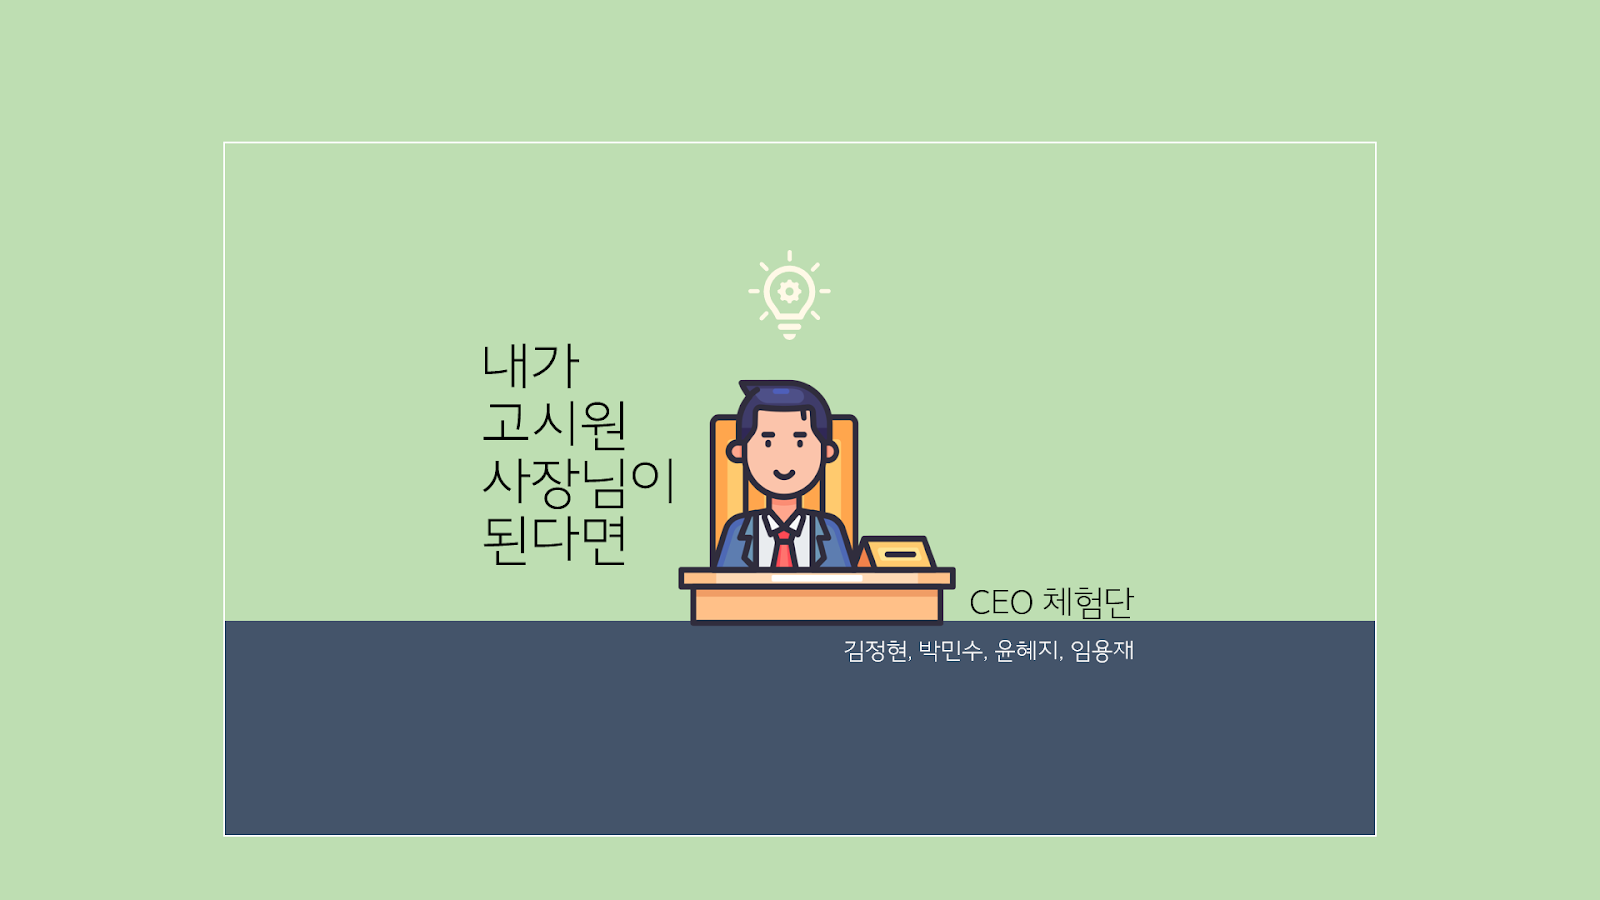

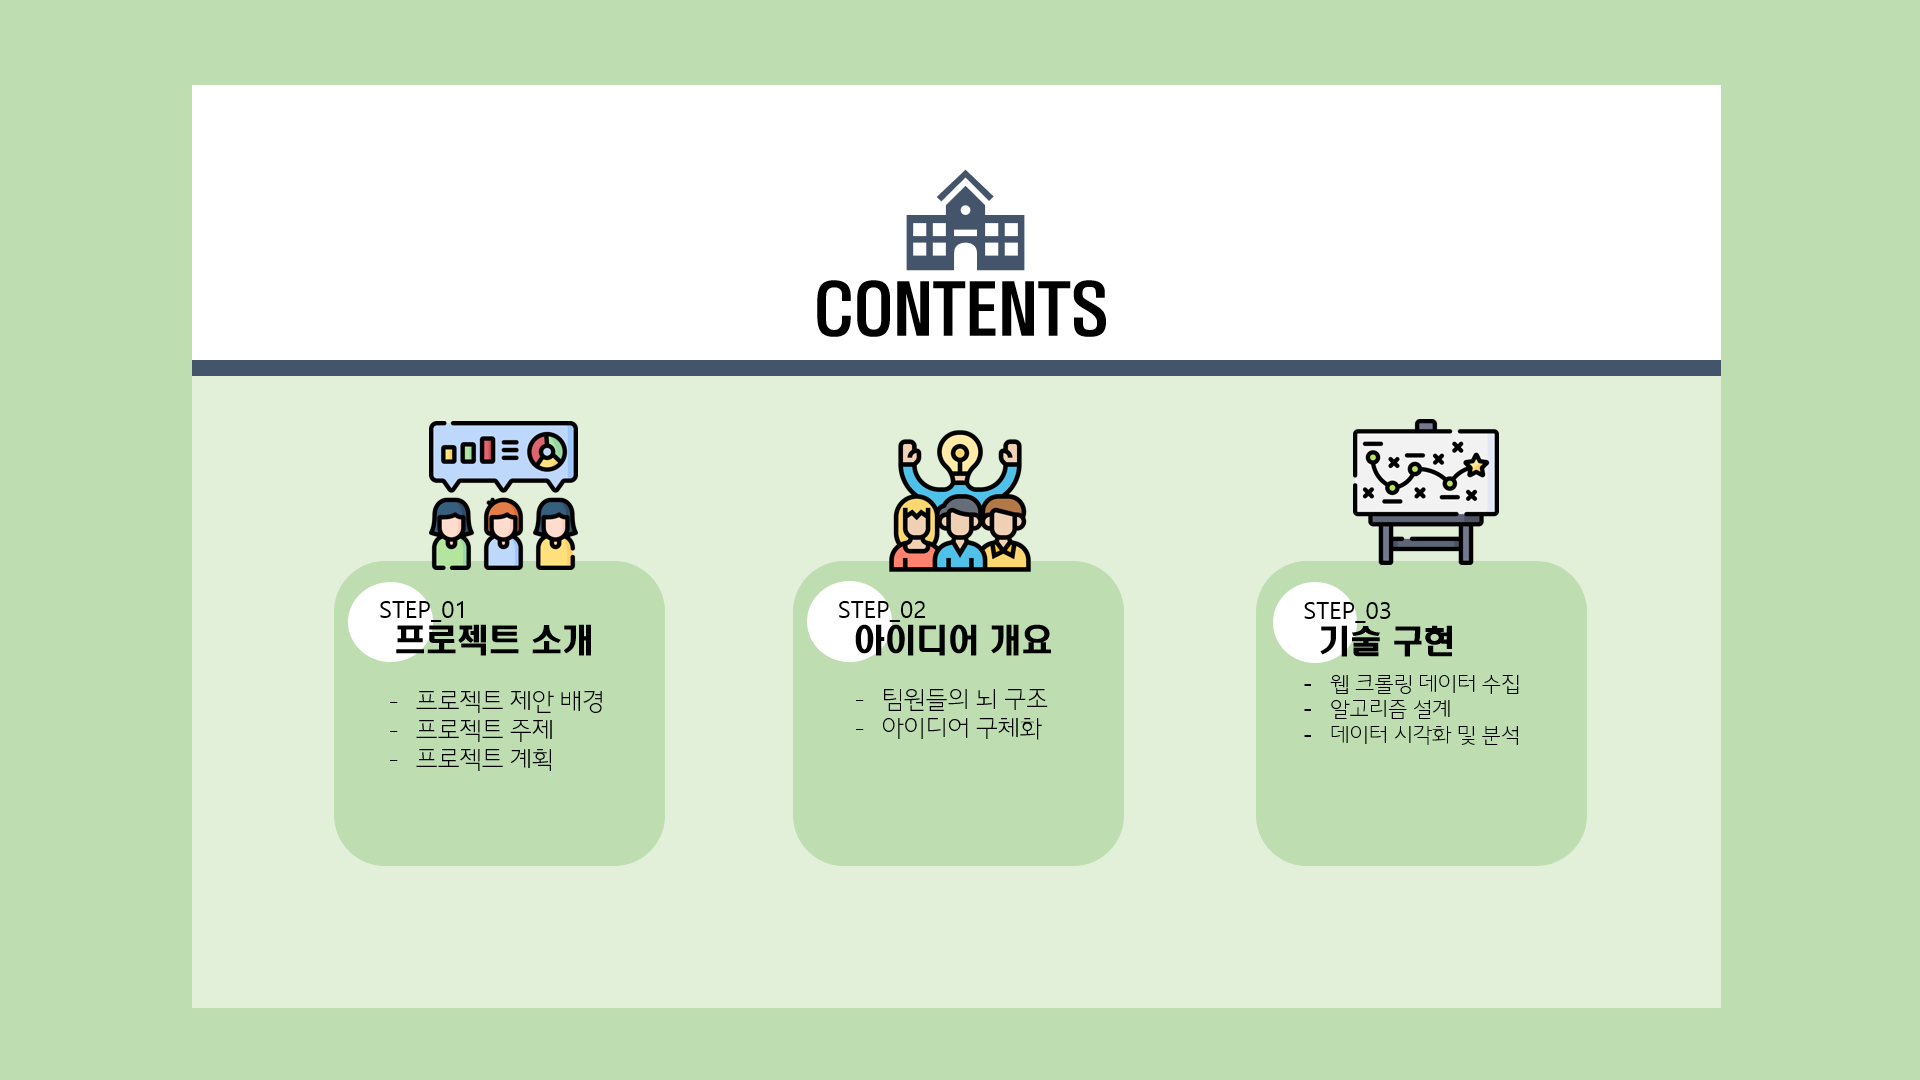

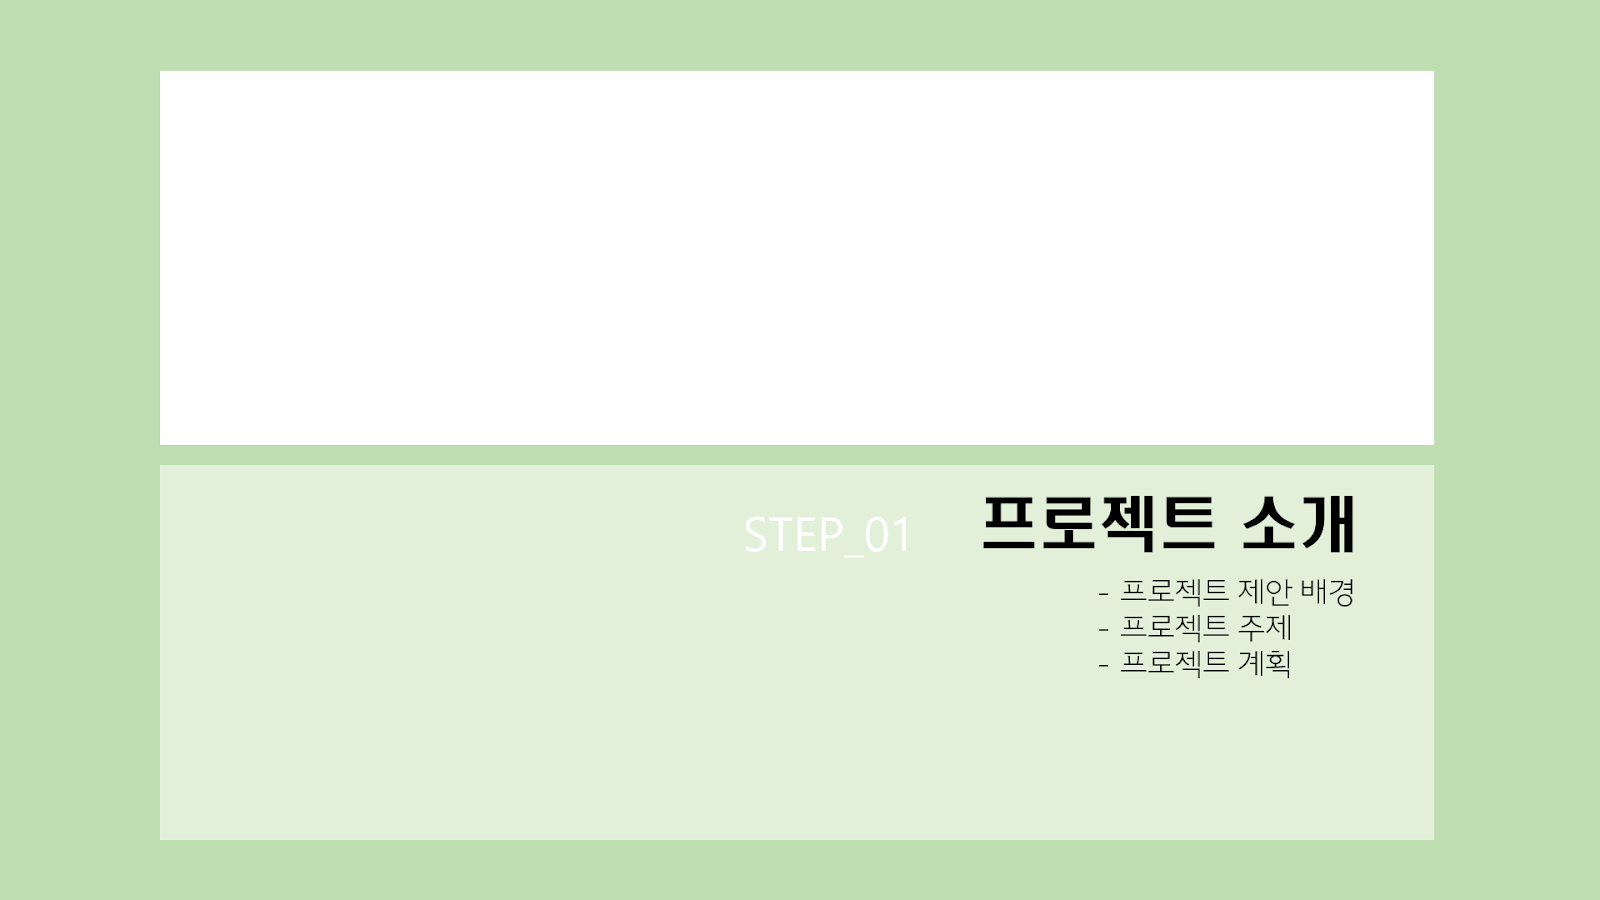

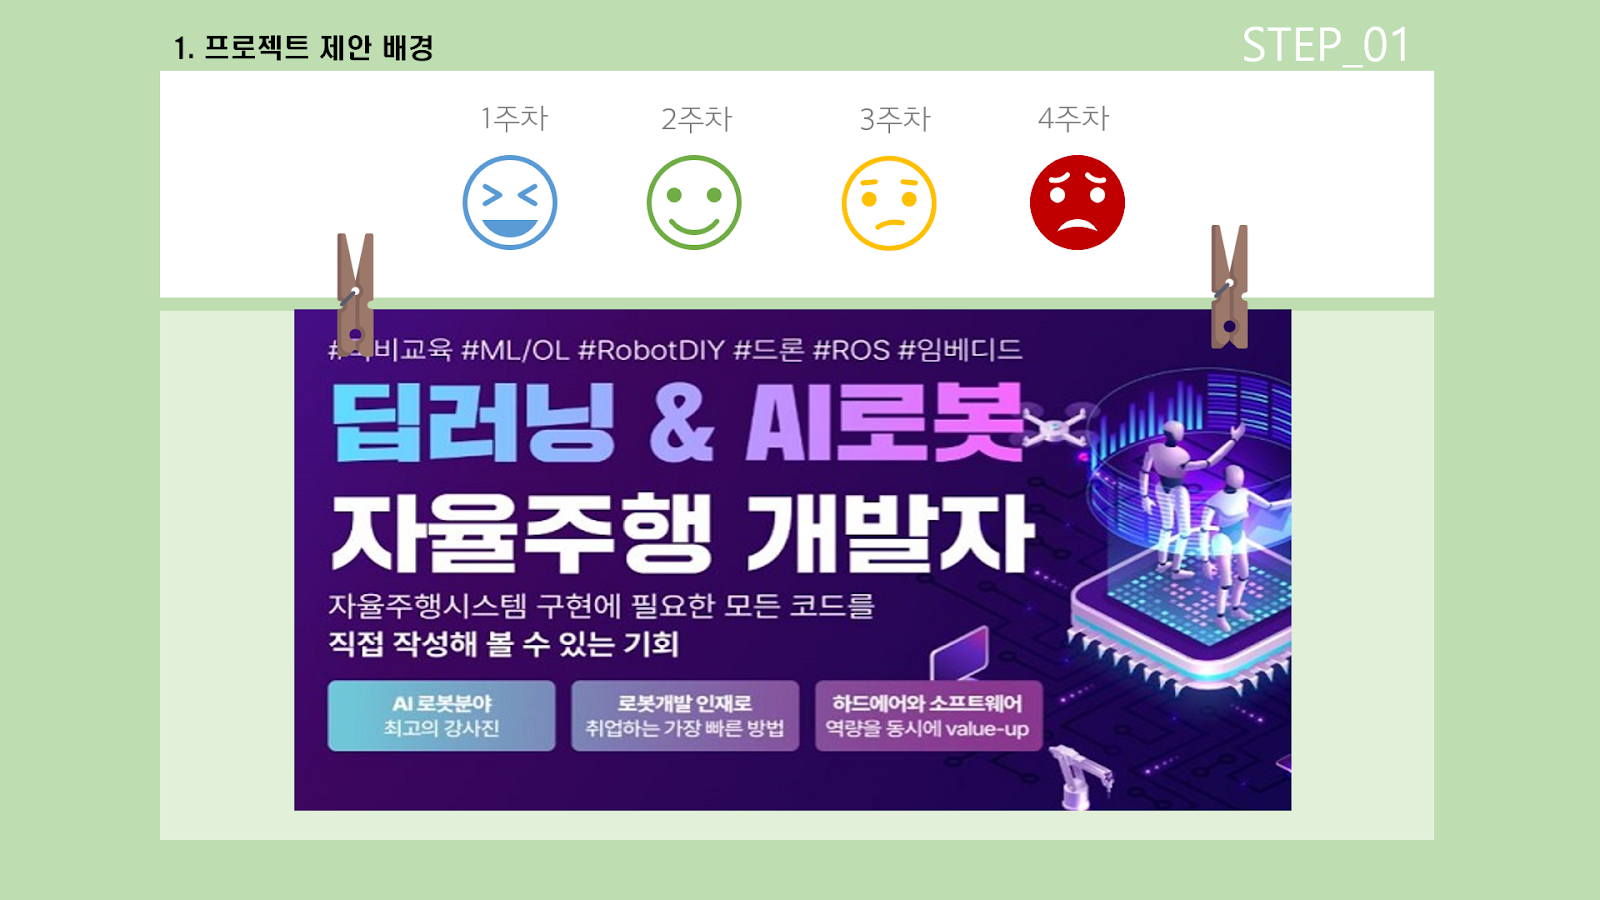

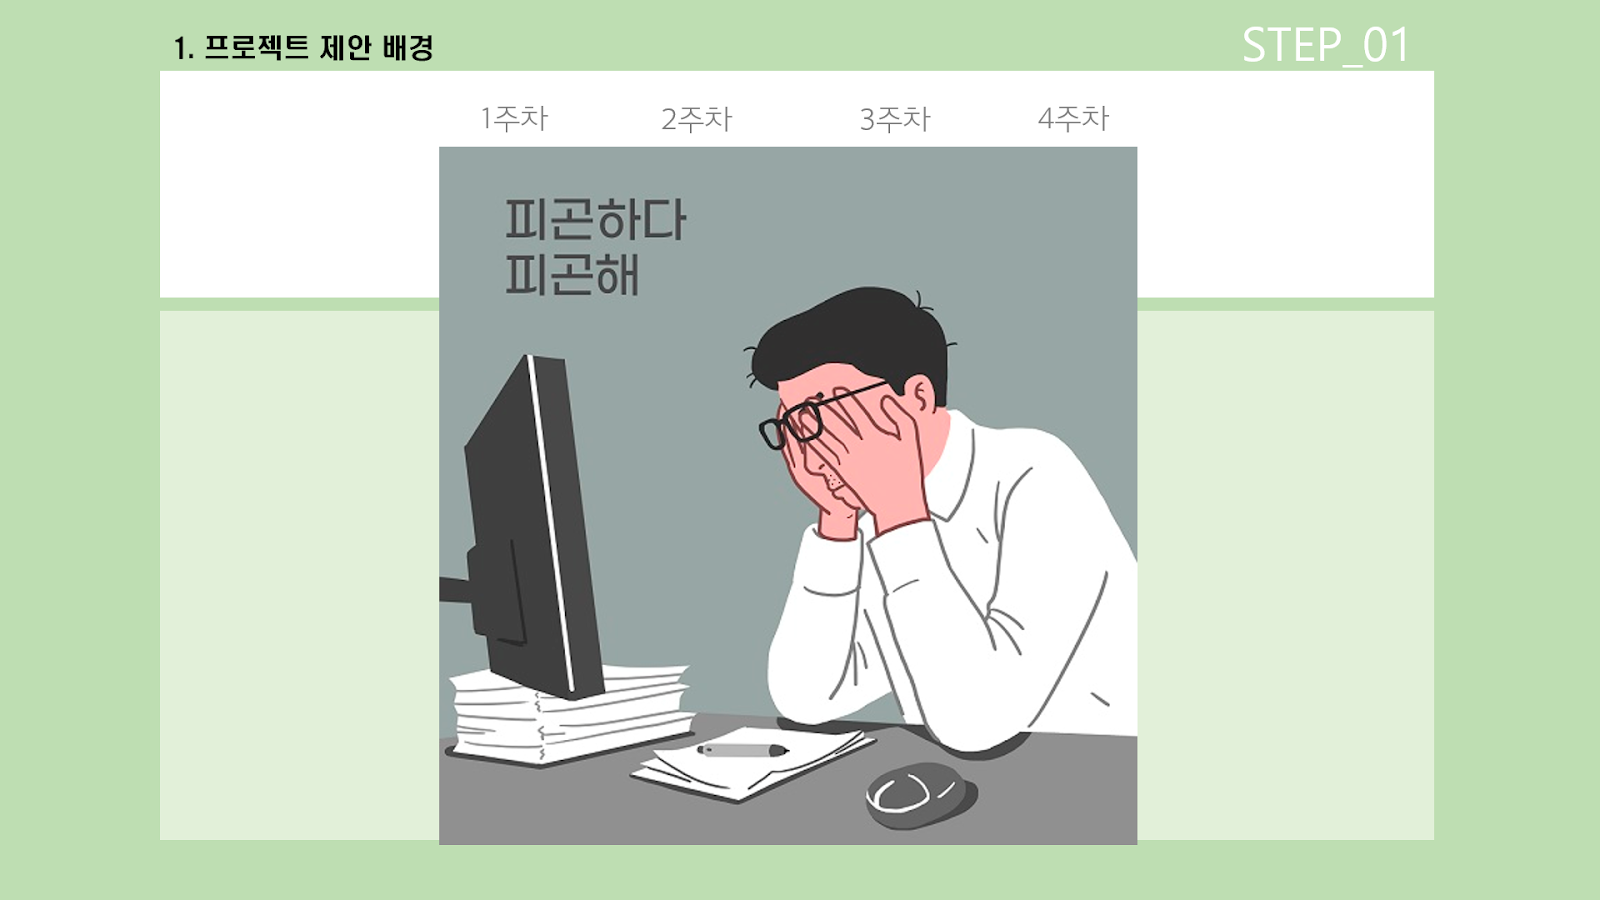

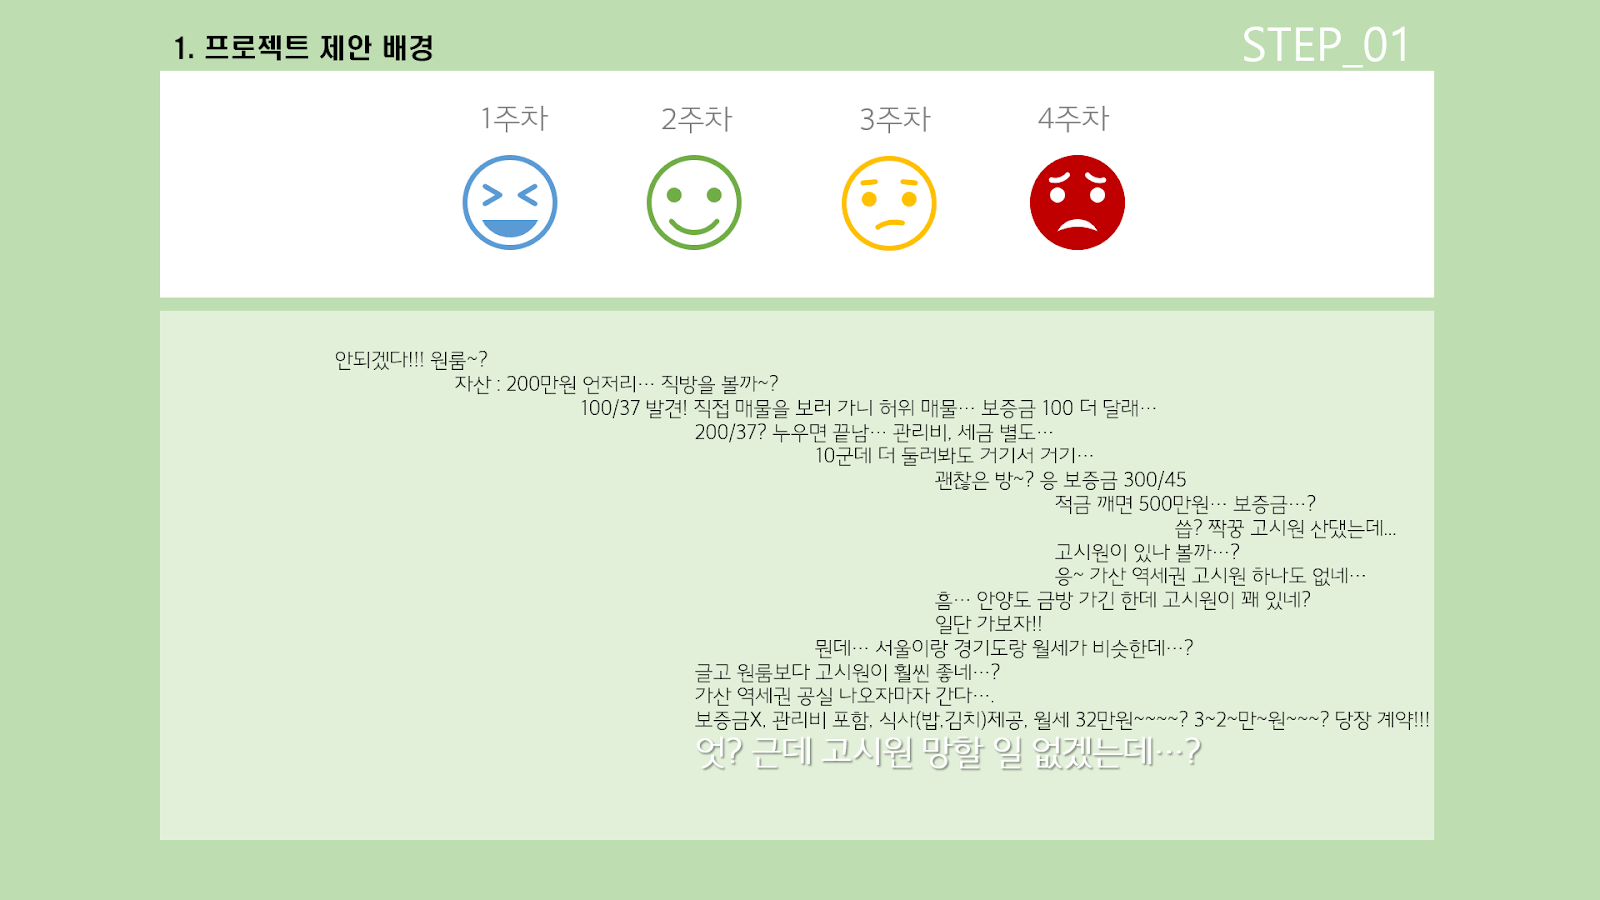

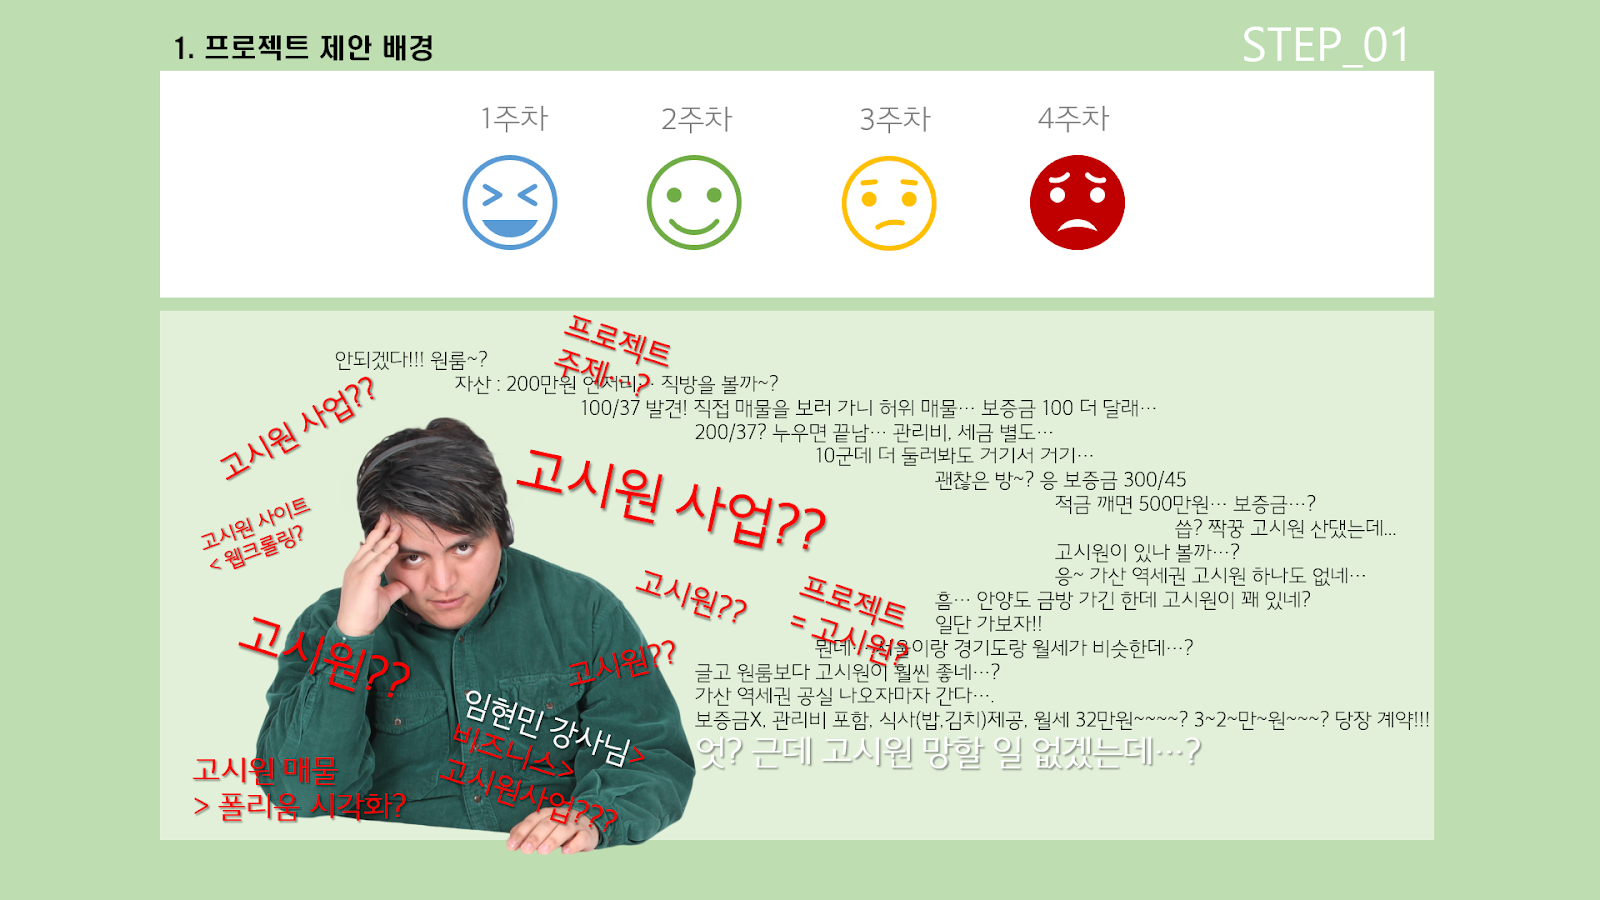

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

- 1인 가구가 늘어나는 사회 현상에 대한 조사

In [8]:

# 1인 가구 현황
alone_human = pd.read_excel('../data/1인가구현황.xlsx')
alone_rlst = alone_human.drop(['가구수', '평균 가구원수(명)'], axis = 1)

alone_rlst
#print(alone_human.columns)


년도  1인가구  2인가구  3인가구  4인가구  5인가구  6인 이상가구
0   1970   NaN   9.7  13.3  15.5  17.7     43.8
1   1975   4.2   8.3  12.3  16.1  18.3     40.7
2   1980   4.8  10.5  14.5  20.3  20.0     29.8
3   1985   6.9  12.3  16.5  25.3  19.5     19.5
4   1990   9.0  13.8  19.1  29.5  18.8      9.8
5   1995  12.7  16.9  20.3  31.7  12.9      5.5
6   2000  15.5  19.1  20.9  31.1  10.1      3.3
7   2005  20.0  22.2  20.9  27.0   7.7      2.3
8   2010  23.9  24.3  21.3  22.5   6.2      1.8
9   2015  27.2  26.1  21.5  18.8   4.9      1.5
10  2016  27.9  26.2  21.4  18.3   4.8      1.4
11  2017  28.6  26.7  21.2  17.7   4.5      1.3
12  2018  29.3  27.3  21.0  17.0   4.3      1.2
13  2019  30.2  27.8  20.7  16.2   3.9      1.0
14  2020  31.7  28.0  20.1  15.6   3.6      0.9
15  2021  33.4  28.3  19.4  14.7   3.3      0.8

In [9]:
# 데이터 내에 null 값이 있어서 결측치 제거
alone_rlst.astype("str")
alone_rlst.columns[alone_rlst.isnull().any()]

Index(['1인가구'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


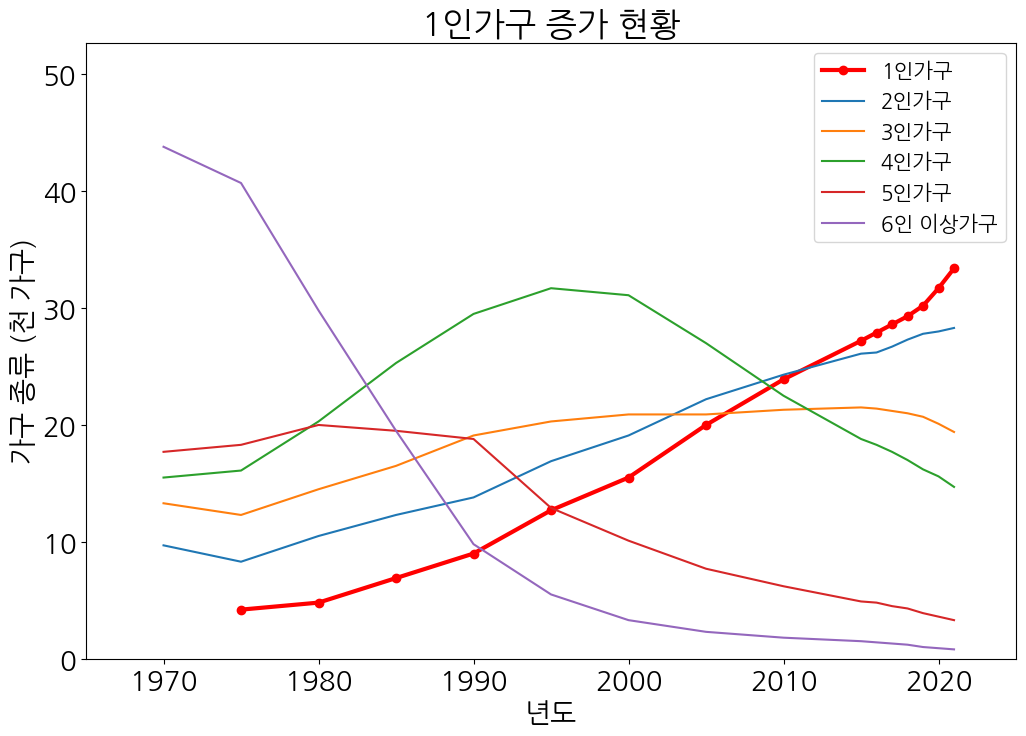

In [10]:
year= alone_rlst['년도']

#폰트종류설정
plt.rcParams["font.family"] = 'NanumGothic'

#폰트크기설정
plt.rcParams["font.size"] = 20

plt.figure(figsize=(12,8))
plt.plot(year, alone_rlst['1인가구'], color='r', marker='o', linewidth=3.0)
plt.plot(year, alone_rlst['2인가구'])
plt.plot(year, alone_rlst['3인가구'])
plt.plot(year, alone_rlst['4인가구'])
plt.plot(year, alone_rlst['5인가구'])
plt.plot(year, alone_rlst['6인 이상가구'])
plt.legend(loc='upper left')
plt.title('1인가구 증가 현황')
plt.xlabel('년도')
plt.ylabel('가구 종류 (천 가구)')

# 그래프 모양이 안이쁘다...
# 그래서 축 범위를 지정하는 로직
# 각 컬럼별 평균값

ax = alone_rlst['년도'].plot()
ax.set_xlim(1965, 2025)
ax.set_ylim(0, (alone_rlst.mean()[4])*2.5)

plt.legend(alone_rlst.columns[1:], loc='upper right', fontsize = 15)
plt.show();


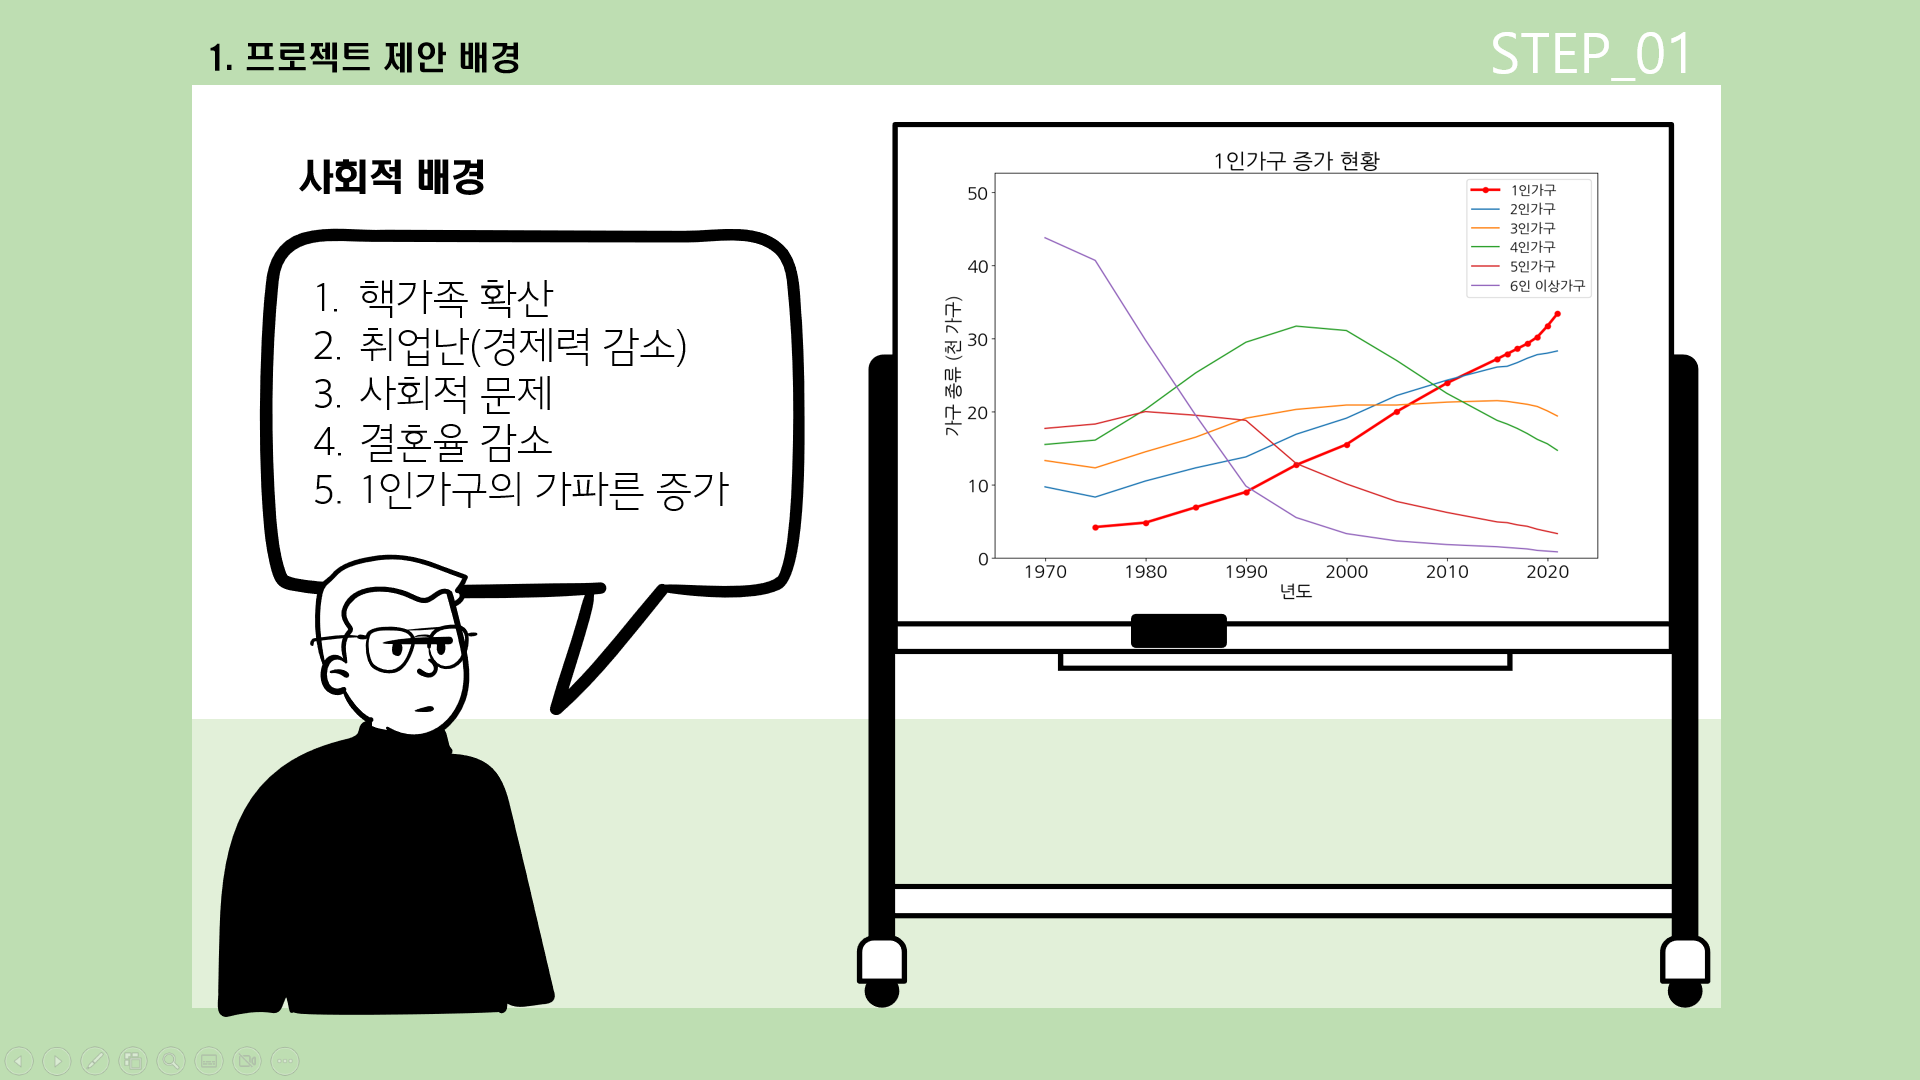

In [11]:
area_reason = pd.read_csv('../data/현재_거처_선택_이유_20230131120904.csv', encoding="euc-kr" )
#area_reason

In [12]:
area_reason.columns = ['항목','내용','가구수', '저렴한 주거비', '통근·통학에 좋은 위치', '생활서비스 제공','개인공간 확보', '예전부터 거주', '가족 등 거주', '기타']
#area_reason = area_reason.set_index('항목')
#area_reason[4:8].set_index('항목')
area_reason.style.hide_index()
area_reason_rslt = area_reason.groupby(area_reason['항목']).get_group("거처 유형")
area_reason_rslt.loc()


/tmp/ipykernel_12459/2804393473.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  area_reason.style.hide_index()


In [14]:
ratio_list = []

columns = area_reason_rslt.columns

for i in range(3,10) :
    ratio_list.append(area_reason_rslt[columns[i]][6])

ratio_list

['43', '74.2', '8', '23.4', '2.9', '4.3', '1.4']

In [15]:
columns[3:]

Index(['저렴한 주거비', '통근·통학에 좋은 위치', '생활서비스 제공', '개인공간 확보', '예전부터 거주', '가족 등 거주',
       '기타'],
      dtype='object')

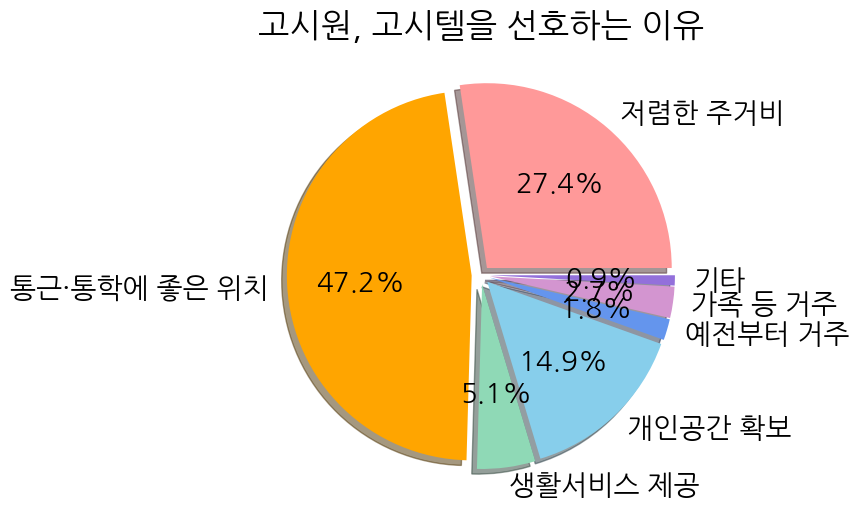

In [16]:
labels = columns[3:]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', 'orange', '#8fd9b6', 'skyblue', 'cornflowerblue', '#d395d0', 'mediumpurple']
plt.figure(figsize=(8, 6))
plt.pie(ratio_list, labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
plt.rcParams['font.family'] = 'NanumGothic'
plt.title('고시원, 고시텔을 선호하는 이유')
plt.show()


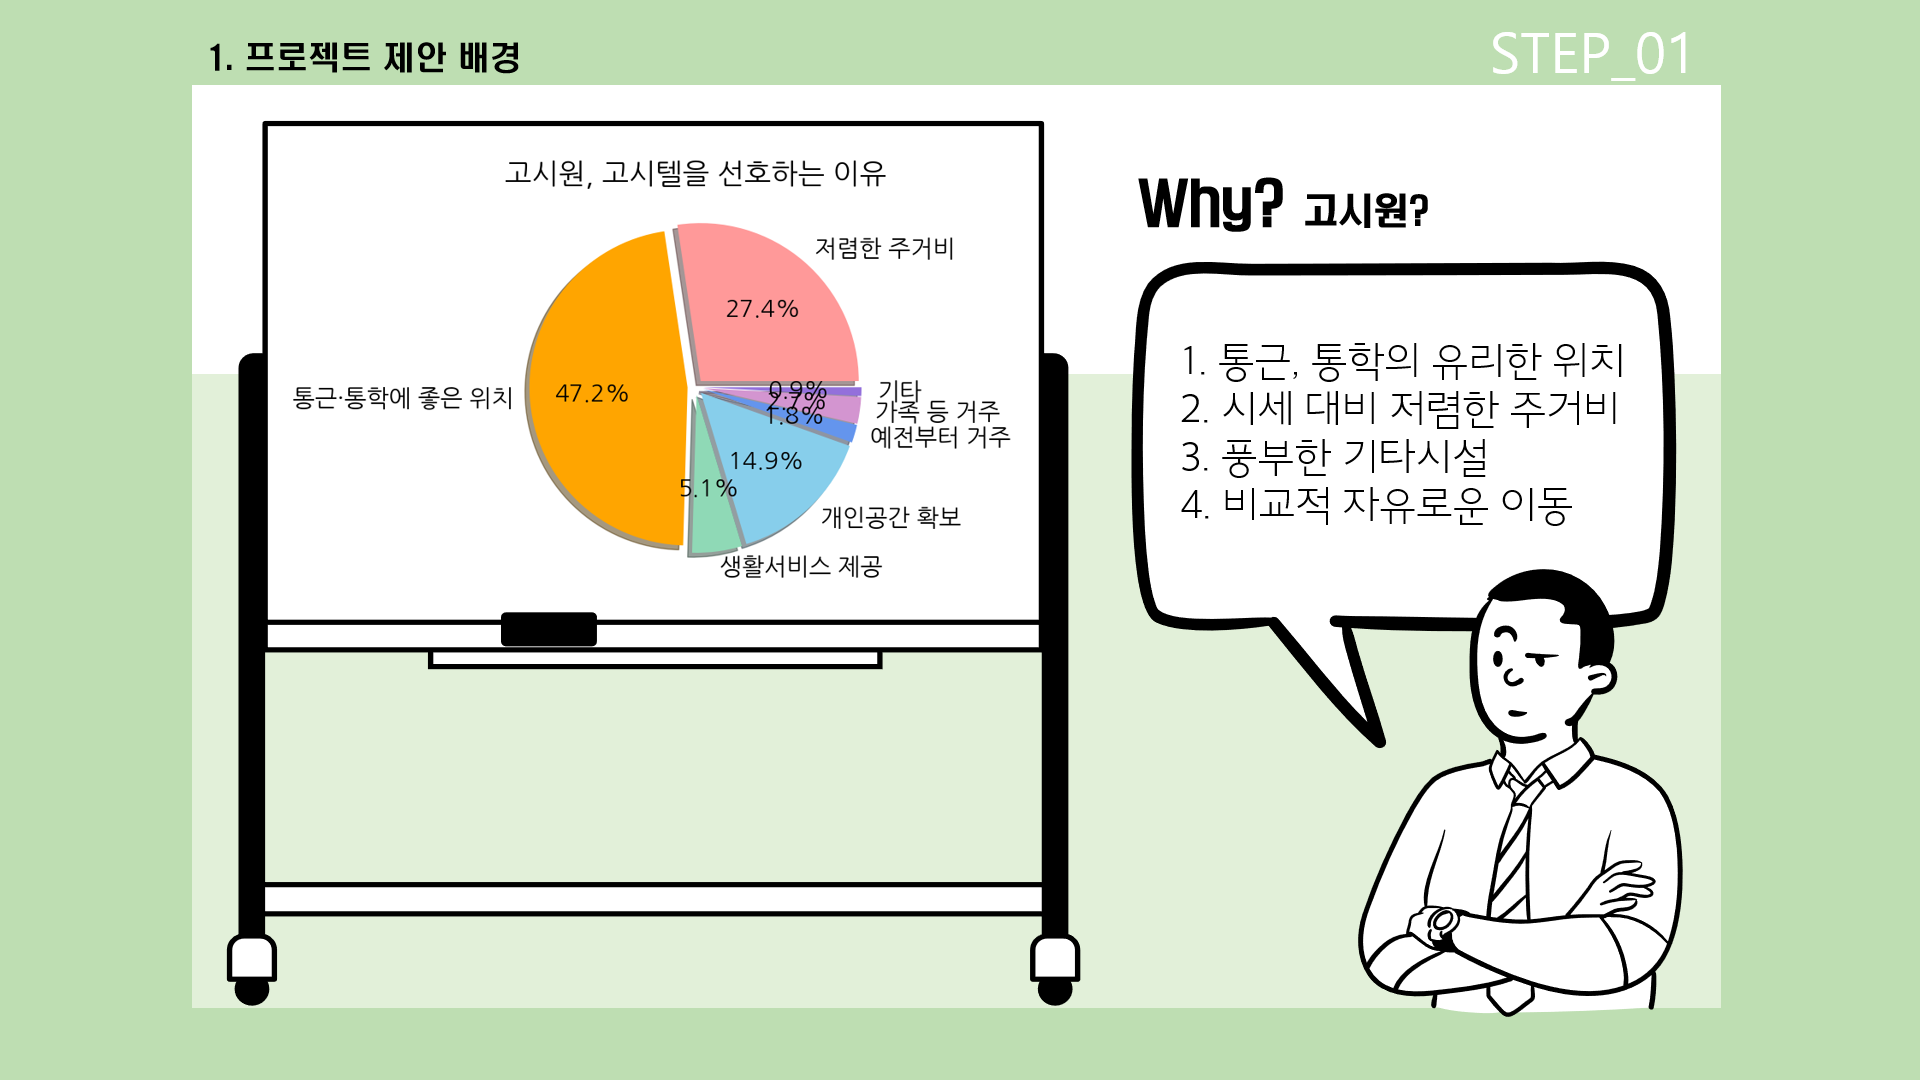

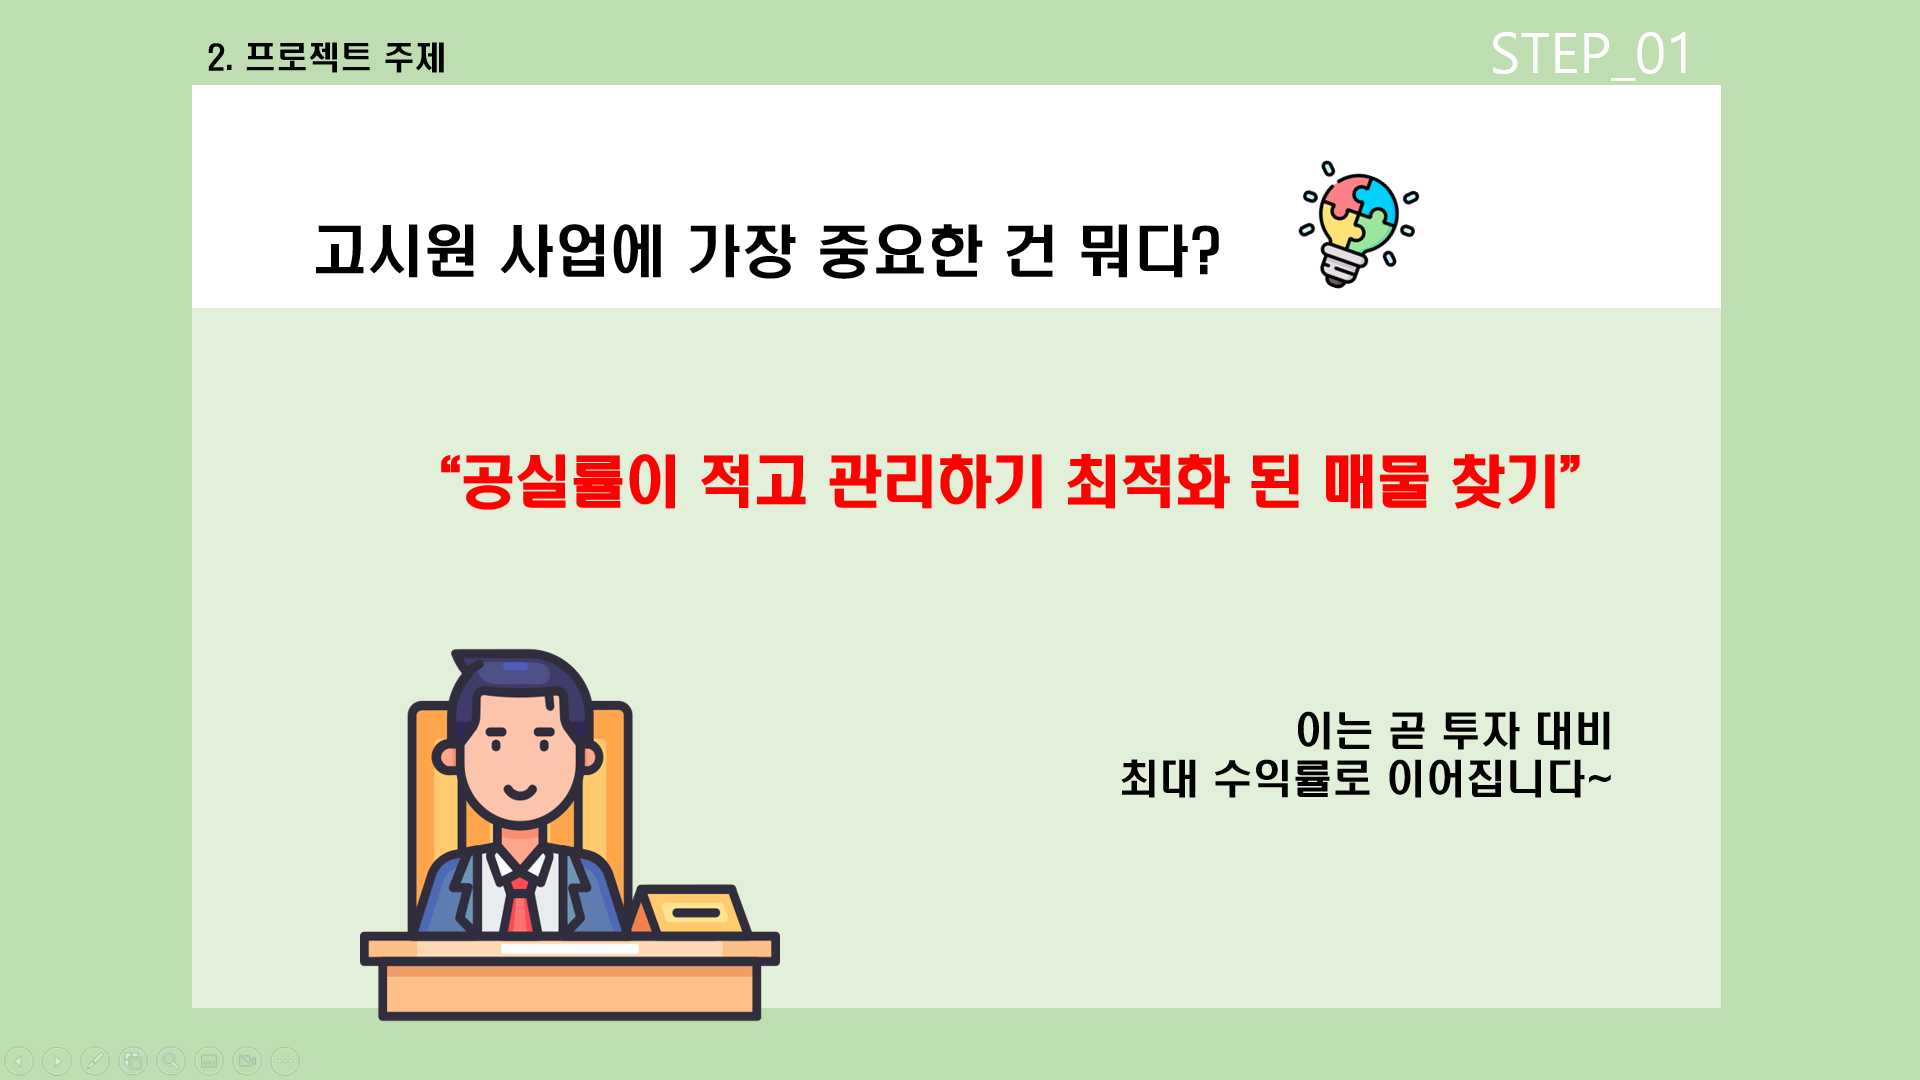

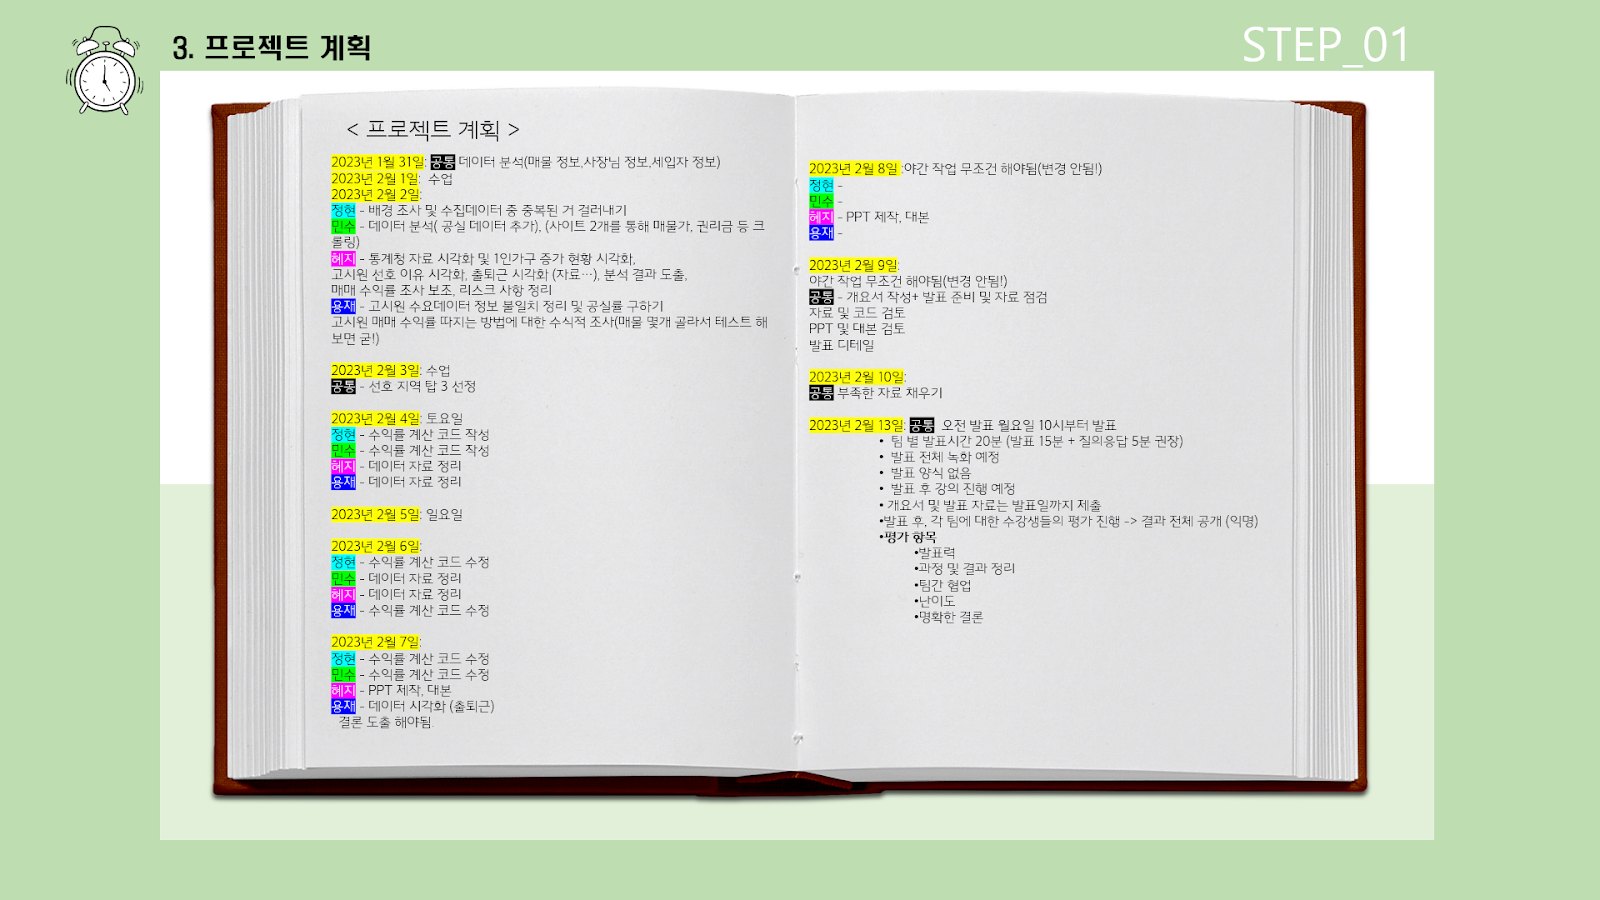

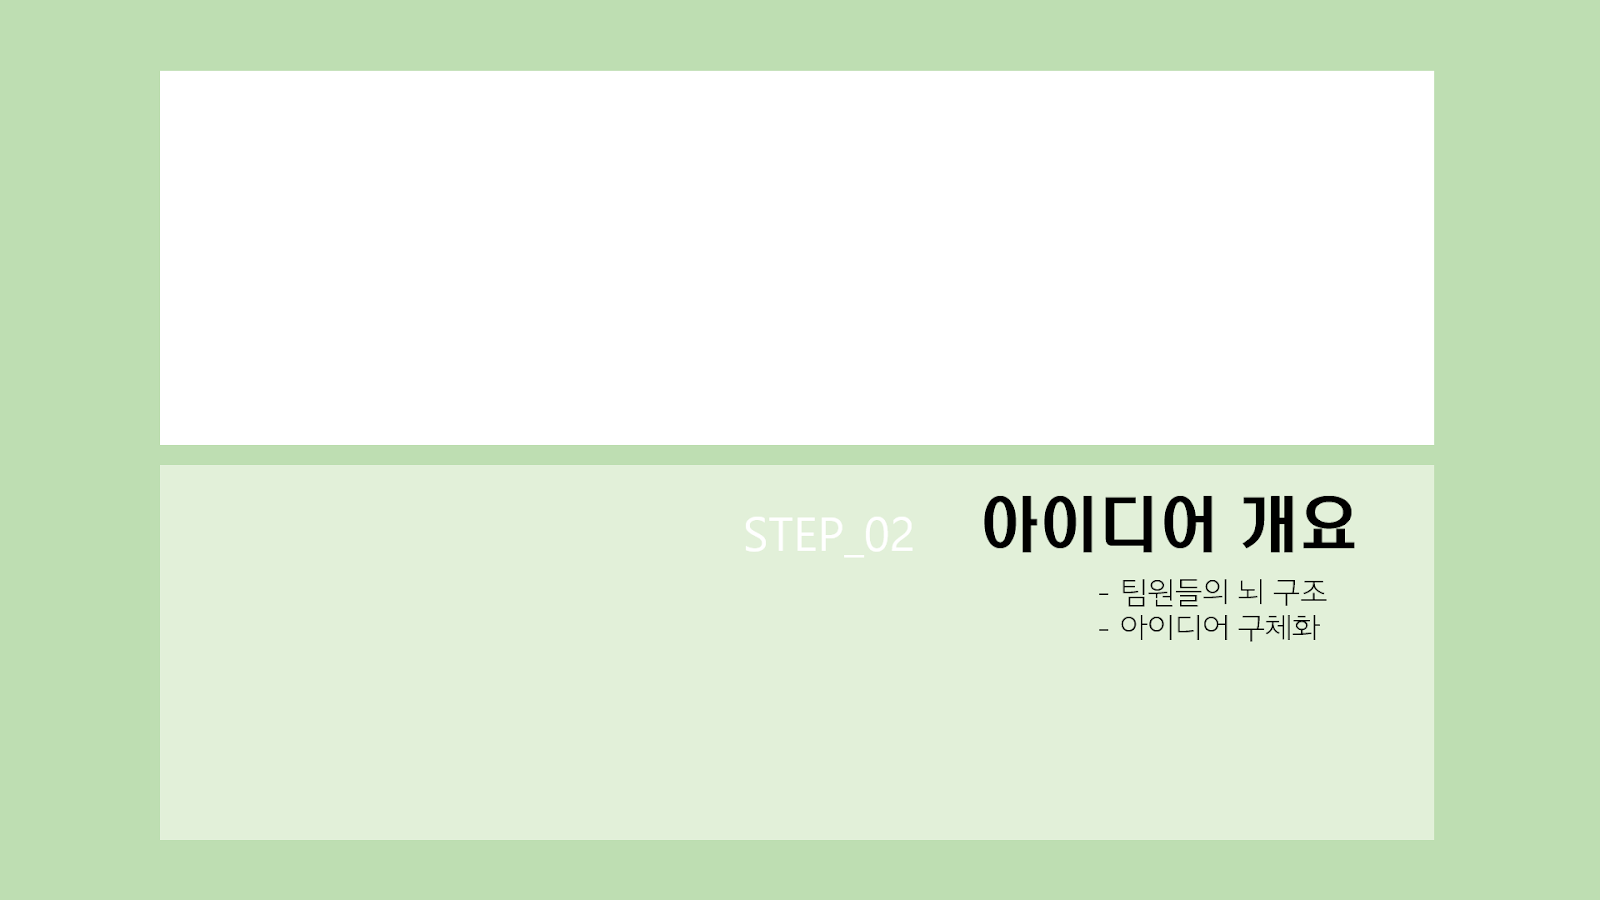

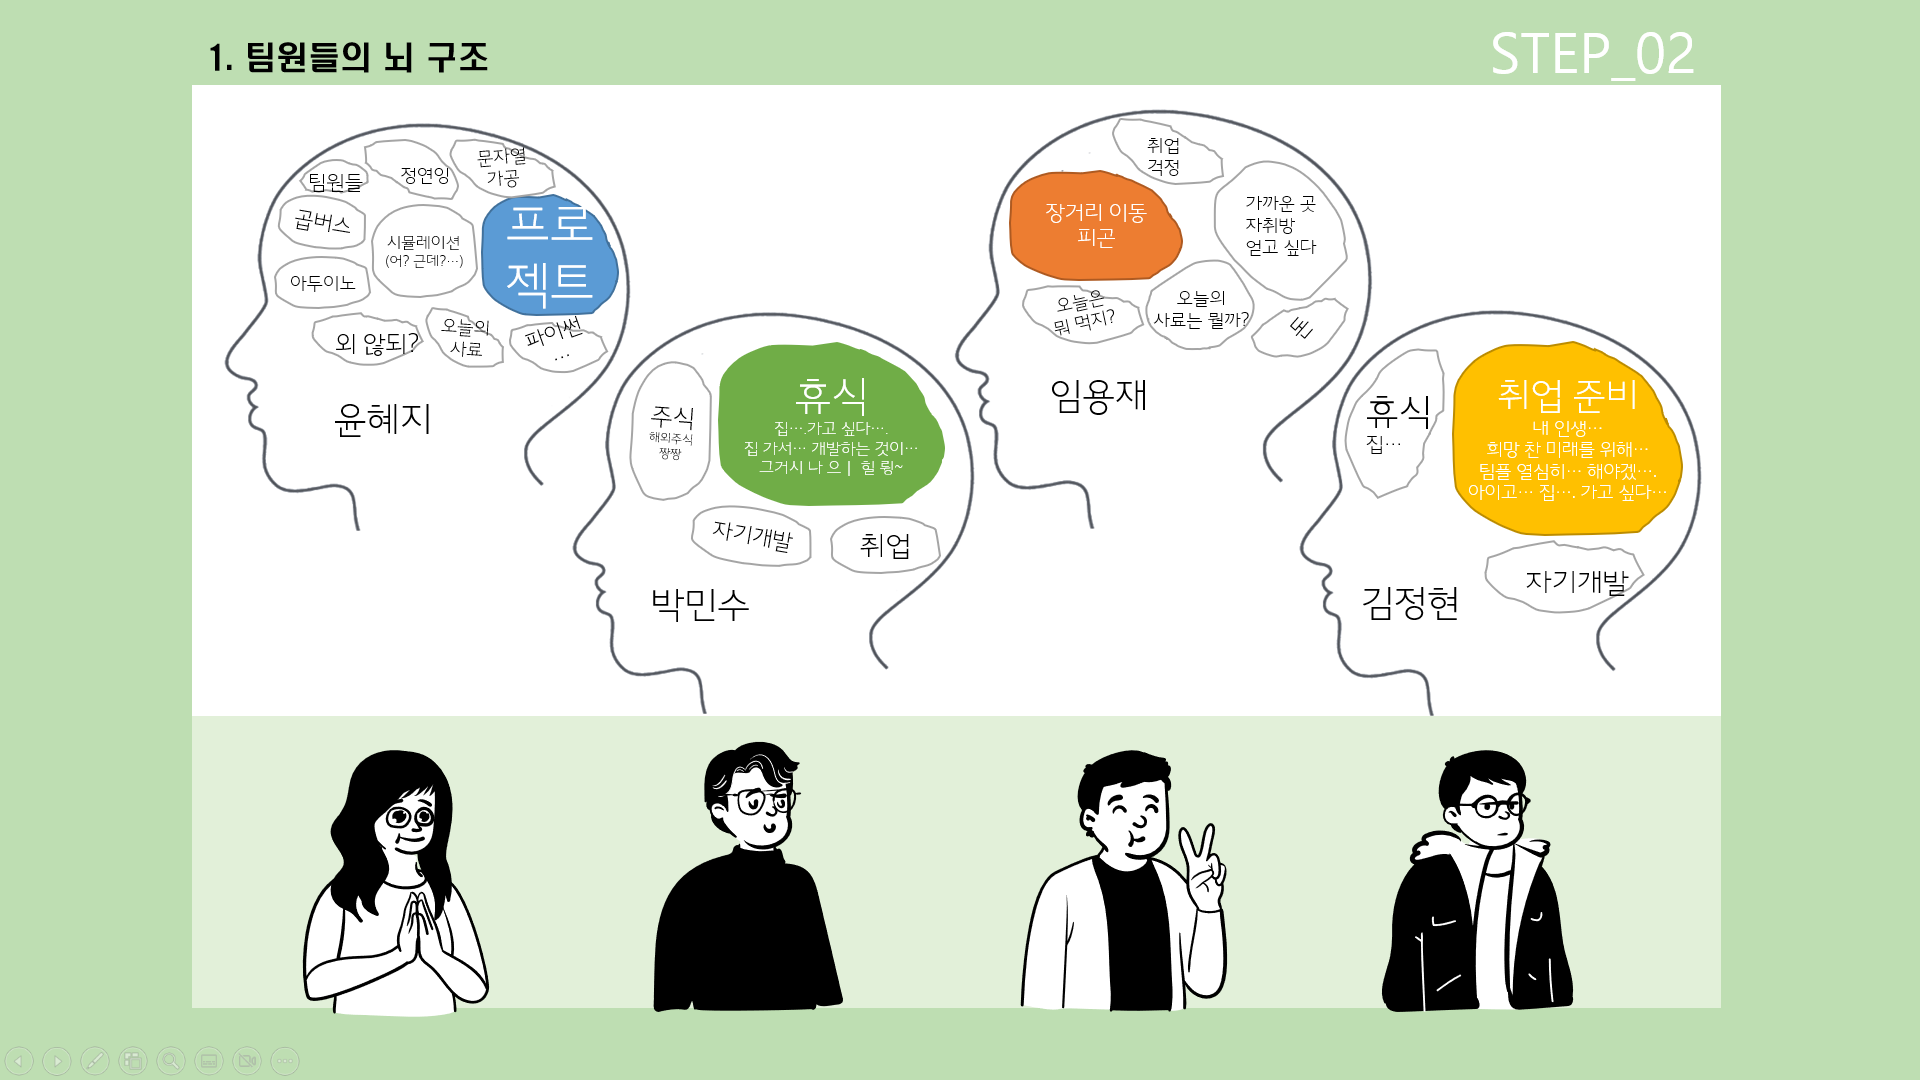

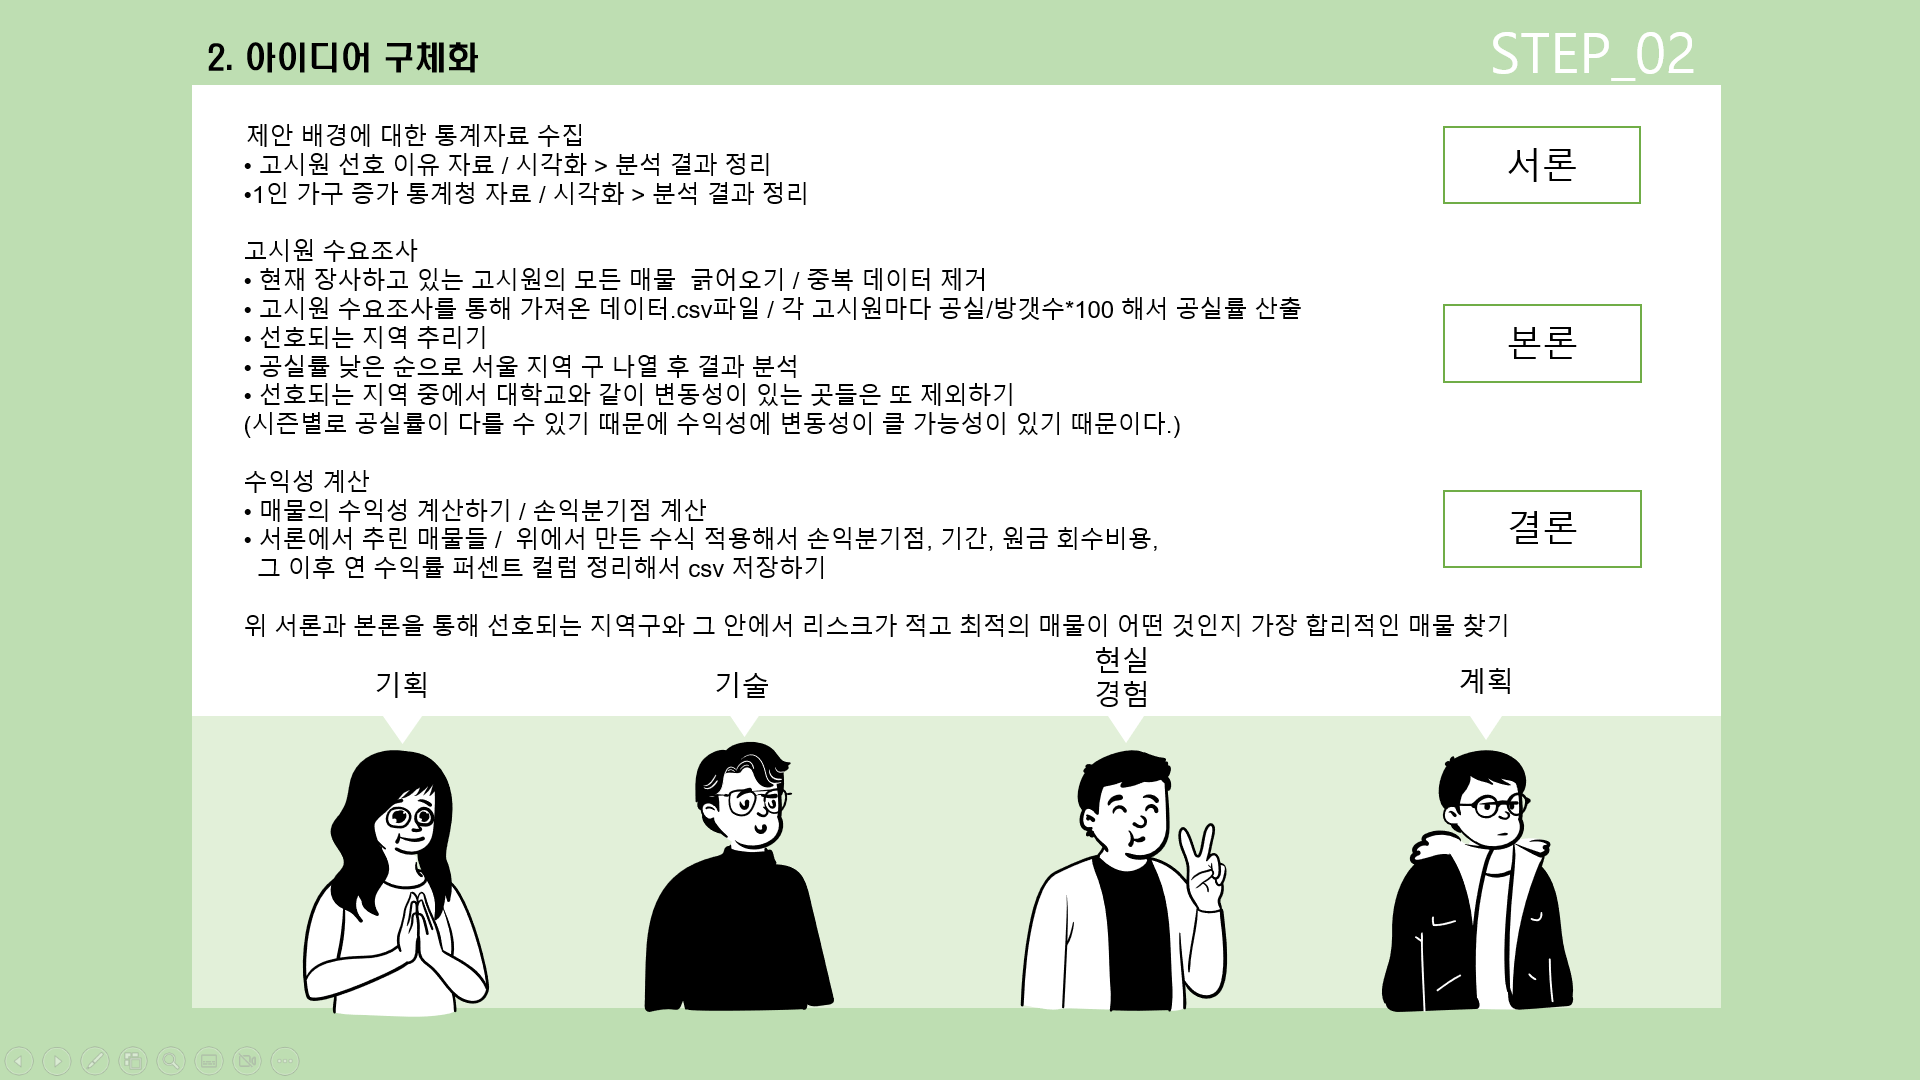

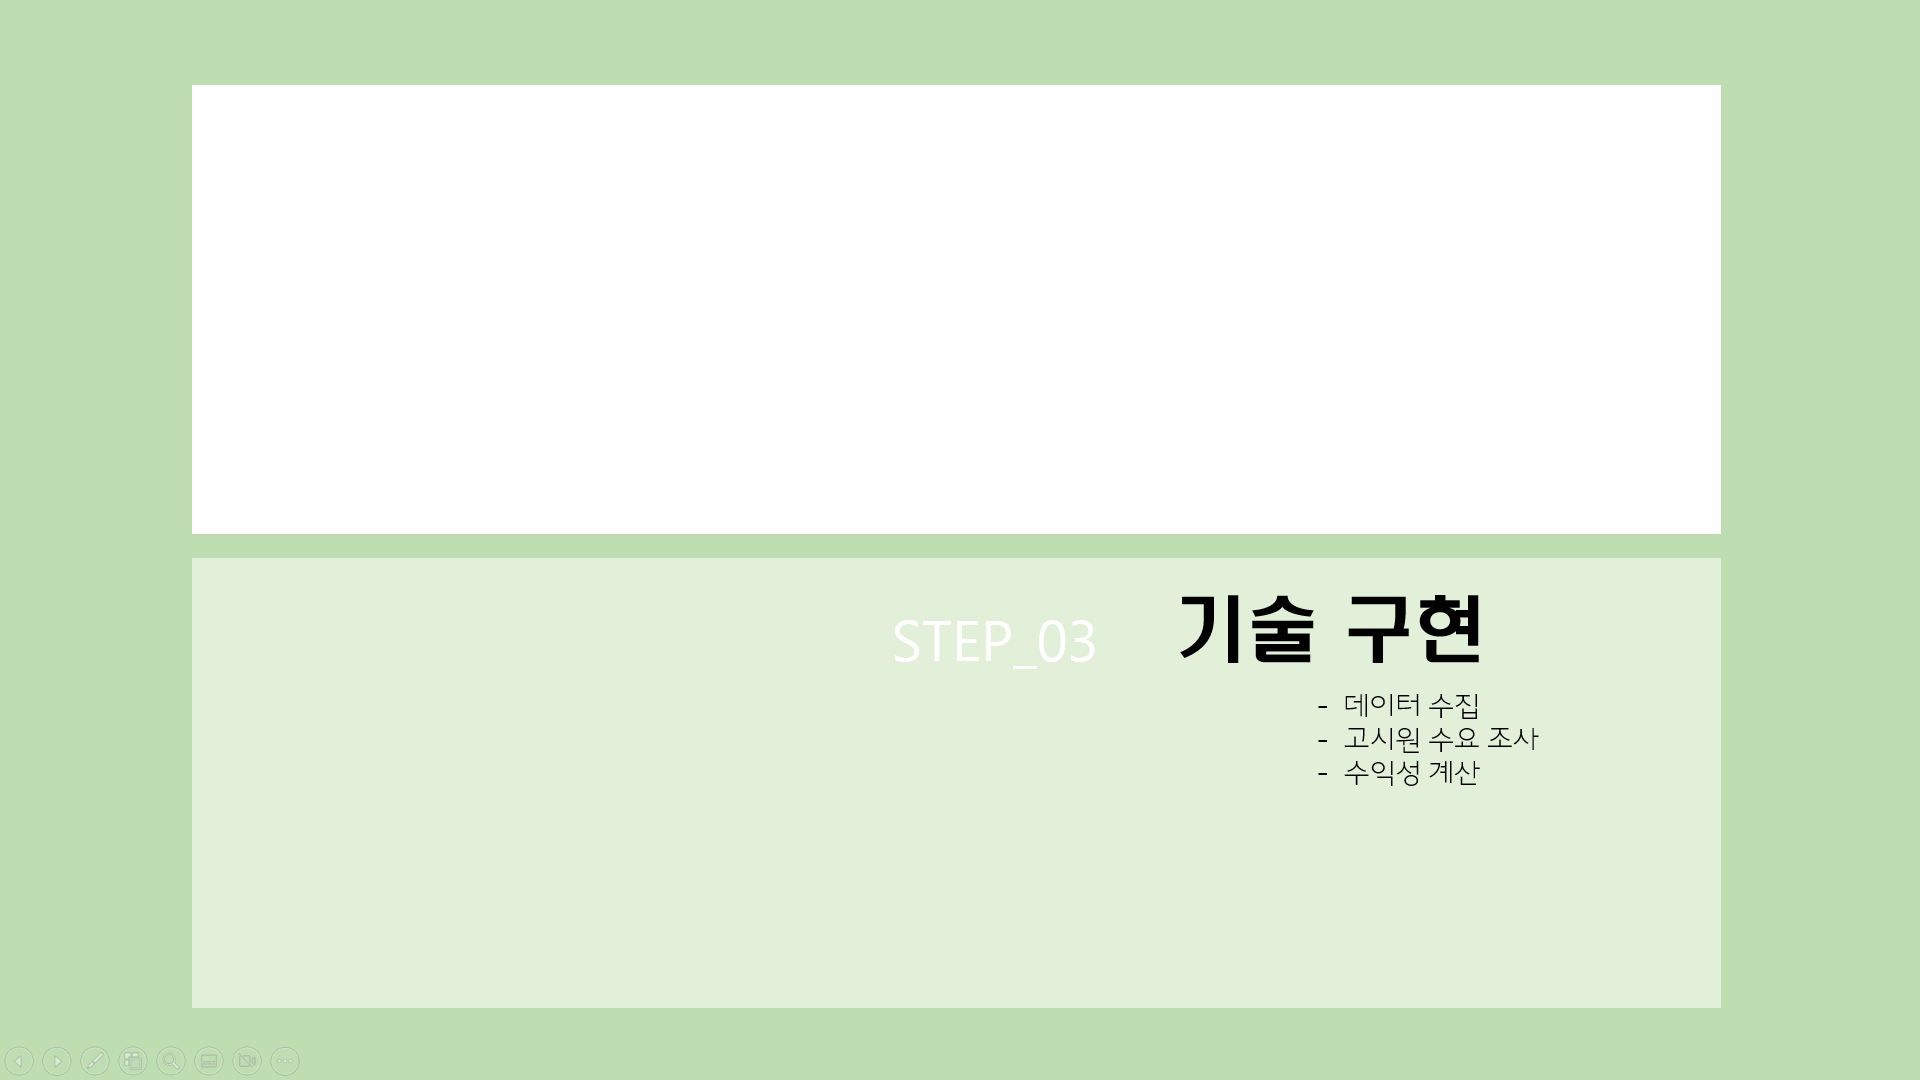

# 1 ) 데이터 수집
---
### 1. 웹 크롤링

     고시원 매물정보 크롤링

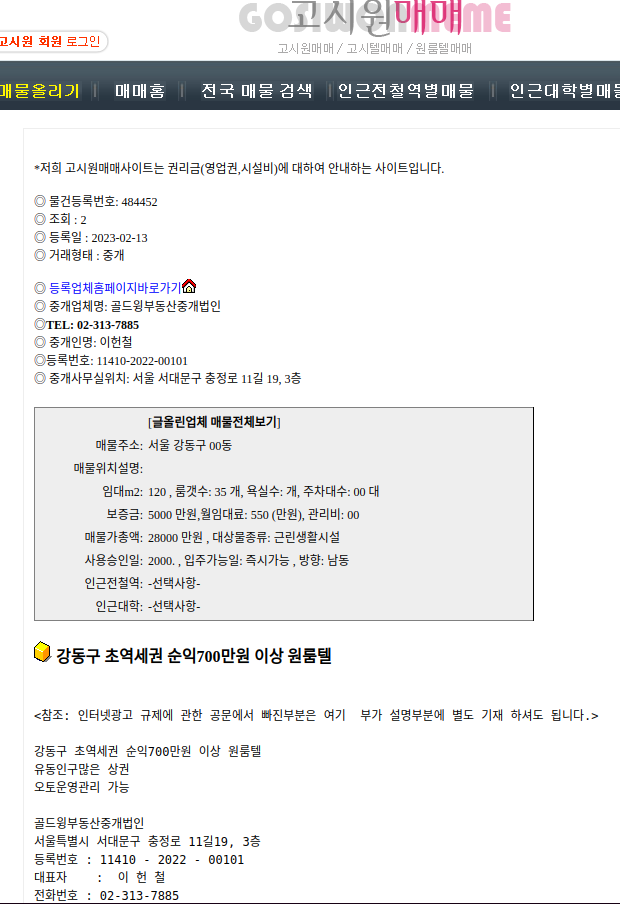

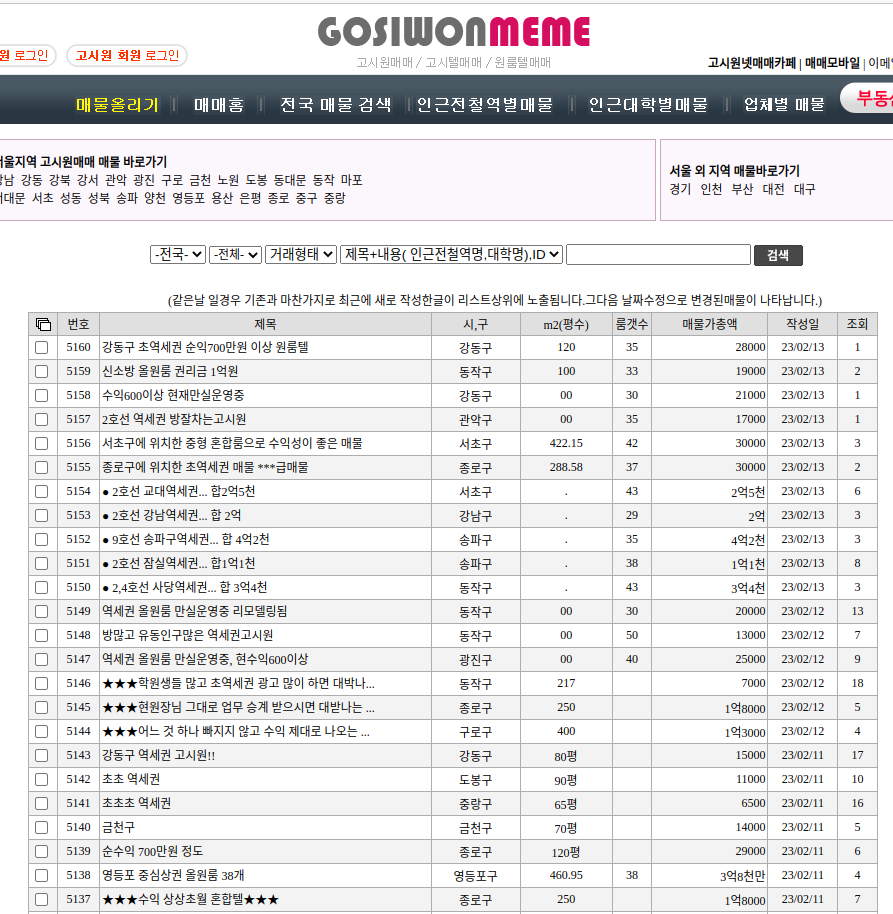

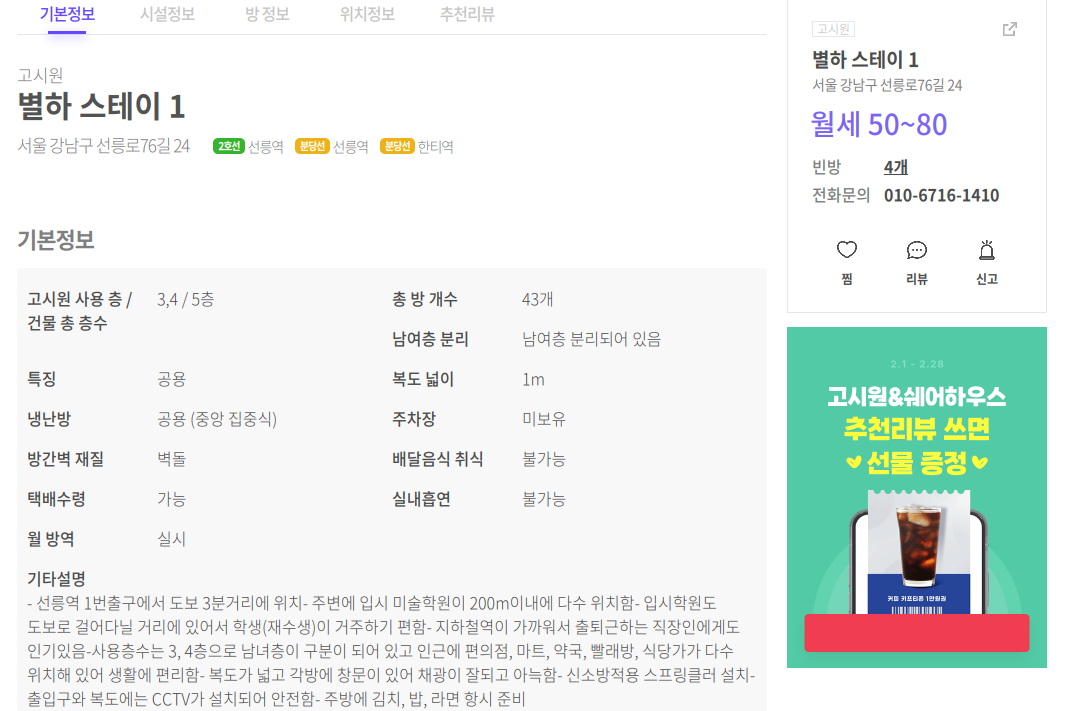

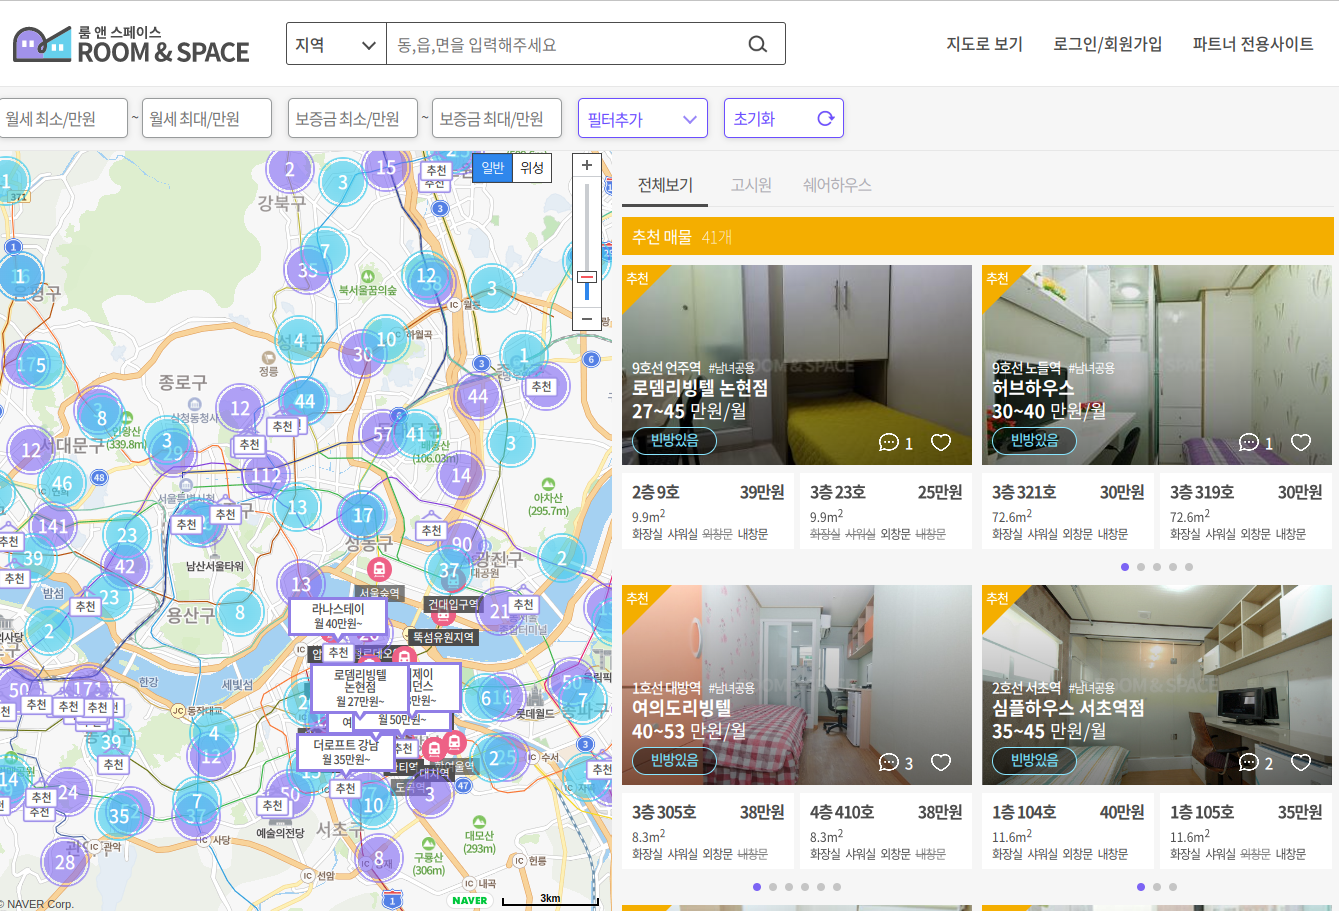

In [17]:
space_info = []

ceo_info = []

tenant_info = []

In [ ]:
# 고시원 이름     고시원 고시텔        위치           인근역          인근역과의 거리      매물사이트    매물번호
name = []; gosiwon_type = []; address = []; subway = []; subway_distance = []; site = []; code = []

# 고시원 매입 시 
# 권리금        보증금           임대료        총 비용                건물 총 평수         방 갯수           방의 평수                         
premium = []; c_deposit =[]; c_rent=[]; total_price = [];  building_scale=[]; room_number = []; c_room_scale=[]

# 세입자 입주 시 
# 보증금           월세            관리비           방 평수           화장실 여부 y/n    욕실       남여공용,남,여,남여분리   y/n      y(가능한 수)/n
t_deposit = []; t_rent = []; fixed_cost = []; t_room_scale = []; toilet = []; bathroom = []; gender = []; meal = []; parking = []
#                                                               방 내부 화장실, 방 내부 욕실,       성별 분리 형태   식사제공      주차 가능                     

sep = []
empty_roon = []
location = []

'''
space_info
매물 정보
    [고시원명, 종류(고시원, 고시텔), 위치,     지하철 , 지하철(거리), 매물사이트, 매물등록번호,, ]
       name,     gosiwon_type, address , subway, subway_distance, site, code

ceo_info
사장님 정보
    [고시원명, 종류(고시원, 고시텔), 위치, 지하철,  지하철역,             권리금, 보증금, 임대료, 총계, 평수(전용면적), 방 갯수, 각방 평수(전용면적)]
      name, gosiwon_type, location , subway, subway_distance,   premium, c_deposit, c_rent, total_price,  building_scale, room_number, c_room_scale
tenant_info
세입자 정보
    [고시원명, 종류(고시원, 고시텔), 위치, 지하철, 지하철(거리),         보증금, 월세, 관리비, 방 평수(전용면적), 개인 화장실(Y,N), 개인 샤워실(Y,N), 성 분리(남녀공용, 남성전용, 여성전용, 남녀분리), 식사제공, 주차가능(Y(대수),N)]
    name, gosiwon_type, location , subway, subway_distance t_deposit, t_rent, fixed_cost, t_room_scale, toilet, bathroom, gender, meal, parking
'''

'\nspace_info\n매물 정보\n    [고시원명, 종류(고시원, 고시텔), 위치,     지하철 , 지하철(거리), 매물사이트, 매물등록번호,, ]\n       name,     gosiwon_type, address , subway, subway_distance, site, code\n\nceo_info\n사장님 정보\n    [고시원명, 종류(고시원, 고시텔), 위치, 지하철,  지하철역,             권리금, 보증금, 임대료, 총계, 평수(전용면적), 방 갯수, 각방 평수(전용면적)]\n      name, gosiwon_type, location , subway, subway_distance,   premium, c_deposit, c_rent, total_price,  building_scale, room_number, c_room_scale\ntenant_info\n세입자 정보\n    [고시원명, 종류(고시원, 고시텔), 위치, 지하철, 지하철(거리),         보증금, 월세, 관리비, 방 평수(전용면적), 개인 화장실(Y,N), 개인 샤워실(Y,N), 성 분리(남녀공용, 남성전용, 여성전용, 남녀분리), 식사제공, 주차가능(Y(대수),N)]\n    name, gosiwon_type, location , subway, subway_distance t_deposit, t_rent, fixed_cost, t_room_scale, toilet, bathroom, gender, meal, parking\n'

In [ ]:
import time
import re

import pandas as pd
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns


%matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

plt.rcParams["axes.unicode_minus"] = False

rc("font", family="NanumGothic")

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
from urllib.request import Request

name = []

for i in range(10000):
    
    if i % 100 == 0:
        print(i)

    url = "https://www.roomnspace.co.kr/gosiwon/info/{}".format(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    
    a1 = soup.find(class_="right_fixed_wrap")
    
    # 고시원 이름
    gosiwon_name = a1.find(class_="name").text

    if len(gosiwon_name) == 0 :
        continue
        
    else:
        print(i, ": T")
        
        # 고시원 이름
        name.append(gosiwon_name)
        
        #주소
        addr = a1.find(class_="addr").text
        address.append(addr)
        
        #  지역 분류
        si = addr.split(" ")[0]
        location.append(si)
        
        # 인근 지하철
        sbw = soup.find(class_="subway_item")
        
        if sbw == None :
            subway.append("N")
        else:
            subway.append(sbw.text.strip().replace("선", "선 "))
        
        #빈방
        empty = a1.find(class_="num roomInfo_size").text
        empty_roon.append(empty)
        
        # 세입자 월세
        rent = a1.find(class_="num").text
        c_rent.append(rent)
        
        a = soup.find(class_="content_box basic_info table lnb_content")

        # 총 방 개수
        room_num = a.find_all("li")[3].text.split(" ")
        room_number.append(room_num)
       
        # 남성전용, 여성전용, ---
        gen = a.find_all("li")[7].text
        gender.append(gen)
        
        a.find_all("li")[5].text
        if "않음" in a.find_all("li")[5].text :
            sep.append("N")
        else:
            sep.append("Y")

        f = a.find_all("li")[13].text
        if len(f.split(" ")) == 1:
            parking.append("N")
        else:
            g, gg = re.search(r'\d+대', f).span()
            parking.append(f[g:gg-1])

        b = soup.find_all(class_="content")[1]

        # 밥 제공 종류
        m = b.find_all("li")[9]
        if len(m) >= 1:
            meal.append("Y")
        else:
            meal.append("N")

In [ ]:
data = []
for n in range(len(name)):
    data.append({
                "지역" : location[n],
                "주소":address[n],
                "인근 지하철": subway[n],
                "고시원명":name[n],
                "빈방":empty_roon[n],
                "총 방갯수":room_number[n],
                "월세":c_rent[n],
                "식사 제공":meal[n],
                "주차 제공":parking[n],
                "남녀 구분":gender[n],
                "층 분리" : sep[n]
            })

df = pd.DataFrame(data)
df

In [ ]:
b = pd.read_csv("../data/gosiwon.csv", encoding="utf-8")
b

In [ ]:
b[b['주소'].str.contains('서울', na = False)]

    고시원 매매 크롤링 

In [ ]:
import re
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
from urllib.request import Request

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

from selenium.webdriver.support import expected_conditions as EC

import time
import re

import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

plt.rcParams["axes.unicode_minus"] = False

rc("font", family="NanumGothic")

In [ ]:
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(), options=chrome_options)
url = 'http://www.xn--299a95ff0txwd.kr/bmemeboard/searchlist.php3?&tbname=gosiwonmeme&page=1&gubuns=&searchword=&cdo=%BC%AD%BF%EF&cgu='
driver.get(url)

In [ ]:
path = '''/html/body/center/center/table[1]/tbody/tr/td/table[2]/tbody/tr[2]/td/table/tbody/tr/td/table/tbody/tr/td/form/table/tbody/tr/td/select[1]/option[2]'''
path2 = '''/html/body/center/center/table[1]/tbody/tr/td/table[2]/tbody/tr[2]/td/table/tbody/tr/td/table/tbody/tr/td/form/table/tbody/tr/td/input[2]'''
path3='''/html/body/center/center/table[1]/tbody/tr/td/table[3]'''

driver.find_element(By.XPATH, path).click()
driver.implicitly_wait(2)
driver.find_element(By.XPATH, path2).click()


a = driver.find_element(By.XPATH, path3)
b = a.find_elements(By.TAG_NAME, "tr")

c = len(b)-4

count=0

for p in range(0, 3000):
    print(p)
    for n in range(0, c):
                
        driver.implicitly_wait(2)
        # 리스트의 1 번째 클릭
        a = driver.find_element(By.XPATH, path3)
        driver.implicitly_wait(2)
        a.find_elements(By.TAG_NAME, "tr")[n+3].find_element(By.TAG_NAME, "a").click()
        
        driver.implicitly_wait(1)
        # 크롤링
        url = driver.page_source
        soup = BeautifulSoup(url, "html.parser")
        
        b = soup.find_all("table")[9]
        b1 = b.find_all("tr")

        b2 = b1[1].find_all("td")
        gosiwon_name = b2[1].text
        name.append(gosiwon_name)
        
        
        b1[3].find_all("td")[0] # 제목
        b2 = b1[3].find_all("td")[1] # 내용
        
        b3 = b2.text.split(",")

        
        # 건물면적 282m2
        
        
        ######## 정보 주로 다 비어있음 
        if len(b3) >= 5:
            m.append(b3[0]+","+b3[1]) # 평수            
            room_number.append(b3[2].split(":")[1]) # 룸갯수
            c_bathroom.append(b3[3].split(":")[1]) # 욕실수
            c_parking.append(b3[4].split(":")[1].strip()) # 주차대수
        else:
            m.append(b3[0]) 
            room_number.append(b3[1].split(":")[1]) # 룸갯수
            c_bathroom.append(b3[2].split(":")[1]) # 욕실수
            c_parking.append(b3[3].split(":")[1].strip()) # 주차대수


        b1[4] # 보증금   // 2500 만원,월임대료: 280 (만원), 관리비: 12만원 // O

        b2 = b1[4].find_all("td")
        b3 = b2[1].text.split(",")

        c_deposit.append(b3[0]) # 보증금  // 2500 만원
        
        b33 = b3[1].split(":")
        
        if len(b33) <= 1:
            c_rent.append(b33) # 월임대료 // 280 // 숫자 
        else:
            c_rent.append(b33[1].split("(")[0])
        
        if len(b3) == 3:
            c_fixed_cost.append(b3[2].split(":")[1]) # 관리비 // 12만원 // 한글 분리할지 고민 *****
        else:
            c_fixed_cost.append("None") # 관리비 // 12만원 // 한글 분리할지 고민 *****


        #매물가총액 // 7000 만원 , 대상물종류: 근린생활시설 // O
        b2 = b1[5].find_all("td")
        b3 = b2[1].text.split(",")

        total_price.append(b3[0].split(" ")[0])  # 7000 // 매물 총액
        #                 b3[1].split(":")[1]  # 근린생활시설 // 건물종류


        #인근전철역 // 주로 -선택사항-
        b2 = b1[7].find_all("td")
        c_subway.append(b2[1].text) ## 인근지하철 ***

        #인근 대학 // 주로 -선택사항-
        b2 = b1[8].find_all("td")
        c_near_ac.append(b2[1].text) ## 인근 대학교 ****
        
        #나오기
        driver.back()
        print("in : ", n)

    # 넘어가기
    driver.implicitly_wait(2)
    path4 = '''/html/body/center/center/table[1]/tbody/tr/td/table[3]/tbody/tr/td/form/table/tbody/tr/td/center/table/tbody/tr/td[2]/font'''
    f = driver.find_element(By.XPATH, path4)

    f2 = f.find_elements(By.TAG_NAME, "a")

    sf = p % 15
    
    if p == 15:
        count = 1

    #time.sleep(1)
    driver.implicitly_wait(2)

    print(f2[ sf + count ].text)

    f2[ sf + count ].click()
    
    # 끝 다음 페이지 



0
in :  0
in :  1
in :  2
in :  3
in :  4
in :  5
in :  6
in :  7
in :  8
in :  9
in :  10
in :  11
in :  12
in :  13
in :  14
in :  15
in :  16
in :  17
in :  18
in :  19
in :  20
in :  21
in :  22
in :  23
in :  24
in :  25
in :  26
in :  27
in :  28
in :  29
in :  30
in :  31
in :  32
in :  33


KeyboardInterrupt: 

In [ ]:
data = []
for n in range(len(c_bathroom)):
    data.append({
                "고시원 이름":name[n],
                "평수":m[n],
                "총 방 갯수":room_number[n],
                "총 욕실 갯수":c_bathroom[n],
                "주차 공간":c_parking[n],
                "보증금":c_deposit[n],
                "월 임대료":c_rent[n],
                "관리비":c_fixed_cost[n],
                "매물 총액":total_price[n],
                "인근 지하철":c_subway[n],
                "인근 대학교":c_near_ac[n]
            })

df = pd.DataFrame(data)
df

# 2 ) 고시원 수요 조사
---

#### 지역별 고시원 시세 및 수요 조사

In [5]:
gosiwon1 = pd.read_csv('../data/gosiwon_final.csv', encoding='utf-8')
gosiwon1

순번    지역                  주소       인근 지하철           고시원명  빈방  총 방갯수  \
0        1  서대문구     서울 서대문구 증가로 130            N          대일고시원   0     40   
1        2   동작구   서울 동작구 노량진로14가길 8     1호선 노량진역         상아탑고시원   0     34   
2        3   마포구      서울 마포구 신촌로8길 5    2호선 홍대입구역    소호리빙텔 홍대신촌점   0     46   
3        4   광진구      서울 광진구 군자로 100  7호선 어린이대공원역         해피존고시텔   0     40   
4        5   광진구      서울 광진구 능동로 378      7호선 중곡역       리빙캐슬 중곡점   0     38   
...    ...   ...                 ...          ...            ...  ..    ...   
2157  2158   관악구     서울 관악구 행운1나길 28   2호선 서울대입구역        밸류 플레이스   1     25   
2158  2159   광진구  서울 광진구 아차산로65길 14       2호선 강변역  더누림 레지던스 강변역점   2     19   
2159  2160   종로구       서울 종로구 종로 121    1호선 종로3가역           썬하우스   1     27   
2160  2161   동작구    서울 동작구 만양로14길 67      9호선 노들역      인덕하이빌 원룸텔   1     31   
2161  2162    중구     서울 중구 청파로 457-1     2호선 충정로역          아워스테이   1     37   

             월세 식사 제공 주차 제공 남녀 구분 층 분리     공실률  Unnamed: 13 Unnamed: 14  \
0     월세  20~30     Y     N    공용    N   0.00%          NaN         NaN   
1     월세  45~55     Y     N    공용    N   0.00%          NaN         강남구   
2     월세  26~47     Y     4    공용    Y   0.00%          NaN         강동구   
3     월세  18~28     Y     4    공용    N   0.00%          NaN         강북구   
4     월세  35~45     Y     5    공용    N   0.00%          NaN         강서구   
...         ...   ...   ...   ...  ...     ...          ...         ...   
2157  월세  50~90     Y     N    공용    N   4.00%          NaN         NaN   
2158  월세  65~95     Y     N    공용    N  10.53%          NaN         NaN   
2159  월세  20~45     Y     N    공용    N   3.70%          NaN         NaN   
2160  월세  30~50     Y     N    공용    N   3.23%          NaN         NaN   
2161  월세  33~43     Y     N    공용    Y   2.70%          NaN         NaN   

     지역 평균 공실률 Unnamed: 16  
0        단위(%)       단위(개)  
1         2.99         235  
2         1.89          76  
3         1.84          42  
4         1.56          45  
...        ...         ...  
2157       NaN         NaN  
2158       NaN         NaN  
2159       NaN         NaN  
2160       NaN         NaN  
2161       NaN         NaN  

[2162 rows x 17 columns]

In [6]:
# 평균 월세
sp_mean = []
for i in gosiwon1['월세'] :
    i = i.replace('월세  ', '')
    sp = i.split('~')
    i = ((int(sp[0])+int(sp[1]))/2)*10000
    #print(sp_mean)
    sp_mean.append(i)
sp_mean

gosiwon1['평균월세'] = pd.to_numeric(sp_mean, downcast='float')
gosiwon1

순번    지역                  주소       인근 지하철           고시원명  빈방  총 방갯수  \
0        1  서대문구     서울 서대문구 증가로 130            N          대일고시원   0     40   
1        2   동작구   서울 동작구 노량진로14가길 8     1호선 노량진역         상아탑고시원   0     34   
2        3   마포구      서울 마포구 신촌로8길 5    2호선 홍대입구역    소호리빙텔 홍대신촌점   0     46   
3        4   광진구      서울 광진구 군자로 100  7호선 어린이대공원역         해피존고시텔   0     40   
4        5   광진구      서울 광진구 능동로 378      7호선 중곡역       리빙캐슬 중곡점   0     38   
...    ...   ...                 ...          ...            ...  ..    ...   
2157  2158   관악구     서울 관악구 행운1나길 28   2호선 서울대입구역        밸류 플레이스   1     25   
2158  2159   광진구  서울 광진구 아차산로65길 14       2호선 강변역  더누림 레지던스 강변역점   2     19   
2159  2160   종로구       서울 종로구 종로 121    1호선 종로3가역           썬하우스   1     27   
2160  2161   동작구    서울 동작구 만양로14길 67      9호선 노들역      인덕하이빌 원룸텔   1     31   
2161  2162    중구     서울 중구 청파로 457-1     2호선 충정로역          아워스테이   1     37   

             월세 식사 제공 주차 제공 남녀 구분 층 분리     공실률  Unnamed: 13 Unnamed: 14  \
0     월세  20~30     Y     N    공용    N   0.00%          NaN         NaN   
1     월세  45~55     Y     N    공용    N   0.00%          NaN         강남구   
2     월세  26~47     Y     4    공용    Y   0.00%          NaN         강동구   
3     월세  18~28     Y     4    공용    N   0.00%          NaN         강북구   
4     월세  35~45     Y     5    공용    N   0.00%          NaN         강서구   
...         ...   ...   ...   ...  ...     ...          ...         ...   
2157  월세  50~90     Y     N    공용    N   4.00%          NaN         NaN   
2158  월세  65~95     Y     N    공용    N  10.53%          NaN         NaN   
2159  월세  20~45     Y     N    공용    N   3.70%          NaN         NaN   
2160  월세  30~50     Y     N    공용    N   3.23%          NaN         NaN   
2161  월세  33~43     Y     N    공용    Y   2.70%          NaN         NaN   

     지역 평균 공실률 Unnamed: 16      평균월세  
0        단위(%)       단위(개)  250000.0  
1         2.99         235  500000.0  
2         1.89          76  365000.0  
3         1.84          42  230000.0  
4         1.56          45  400000.0  
...        ...         ...       ...  
2157       NaN         NaN  700000.0  
2158       NaN         NaN  800000.0  
2159       NaN         NaN  325000.0  
2160       NaN         NaN  400000.0  
2161       NaN         NaN  380000.0  

[2162 rows x 18 columns]

#### 지역별 고시원 매매 사이트로 공실이 적은 고시원 조사

In [7]:
# 공실률 추가 계산
gosiwon1['공실률'] = round((gosiwon1['빈방']/gosiwon1['총 방갯수'])*100, 2)
gosiwon1 = gosiwon1.sort_values(by=["지역"], ascending=True)

In [8]:
# 지역 평균 공실률
zero_avg = pd.DataFrame()
zero_avg['지역'] = list((sorted(set(gosiwon1['지역']))))
zero_avg['평균공실률(%)'] = list(round(gosiwon1['공실률'].groupby(gosiwon1['지역']).mean(), 2))
zero_avg['평균공실갯수(개)'] = list(round(gosiwon1['빈방'].groupby(gosiwon1['지역']).mean(), 2))
zero_avg['매물 개수(개)'] = list(gosiwon1['빈방'].groupby(gosiwon1['지역']).count())
zero_avg['평균월세(원)'] = list(round((gosiwon1['평균월세'].groupby(gosiwon1['지역']).mean()), -2))
zero_avg.sort_values('평균공실률(%)', ascending=True)

지역  평균공실률(%)  평균공실갯수(개)  매물 개수(개)   평균월세(원)
9    도봉구      0.46       0.18        17  319100.0
7    금천구      1.08       0.35        31  376800.0
3    강서구      1.56       0.42        45  341700.0
20   용산구      1.65       0.54        28  369500.0
18   양천구      1.73       0.55        38  352000.0
2    강북구      1.84       0.67        42  346200.0
21   은평구      1.84       0.59        37  401100.0
1    강동구      1.89       0.64        76  377400.0
22   종로구      2.04       0.69       108  421200.0
23    중구      2.04       0.81        96  411800.0
24   중랑구      2.18       0.62        42  322300.0
13  서대문구      2.30       0.84       103  394900.0
6    구로구      2.46       0.81        57  357500.0
17   송파구      2.53       0.83       138  418800.0
19  영등포구      2.59       1.01       116  375900.0
10  동대문구      2.62       1.00        90  366800.0
12   마포구      2.65       1.02        86  402300.0
0    강남구      2.99       1.02       235  483100.0
16   성북구      3.00       0.95        61  371100.0
15   성동구      3.25       1.14        57  383200.0
4    관악구      3.32       1.10       124  334500.0
5    광진구      3.51       0.98        99  390400.0
11   동작구      3.94       1.42       236  382800.0
14   서초구      4.08       1.39       142  446400.0
8    노원구      4.36       1.64        58  357900.0

    지역별 데이터 시각화

In [9]:
# 공실률 지역구별 Folium 지도 시각화
import folium
import json
import re

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
print(geo_json)


https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json


In [10]:
m = folium.Map(
    location = [37.56, 126.97], # 서울특별시 중간 위치
    zoom_start= 11.5
)

cp = folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = zero_avg,
    columns = ['지역', '평균공실률(%)'],
    key_on = 'feature.properties.name',
    fill_color = 'RdGy',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='서울 지역구별 공실률(%)',
).add_to(m)

state_data_indexed = zero_avg.set_index('지역')
#print(state_data_indexed)

for s in cp.geojson.data['features']:
    s['properties']['평균월세(원)'] = int(state_data_indexed.loc[s['properties']['name'], '평균월세(원)'])
    s['properties']['평균 공실률(%)'] = float(state_data_indexed.loc[s['properties']['name'], '평균공실률(%)'])
    s['properties']['매물 개수(개)'] = int(state_data_indexed.loc[s['properties']['name'], '매물 개수(개)'])
#print(cp.geojson.data['features'])
#print(cp.geojson.data)


In [11]:
folium.GeoJsonTooltip(['name', '평균월세(원)', '평균 공실률(%)', '매물 개수(개)']).add_to(cp.geojson)
folium.LayerControl().add_to(m)
m

# 3 ) 수익성 계산
---

### 수익률 알고리즘 설계
- 손익분기점 대비 원금 회수 기간

  - 선형 그래프로 나타내기
  - 지역별 도표로 통계내기

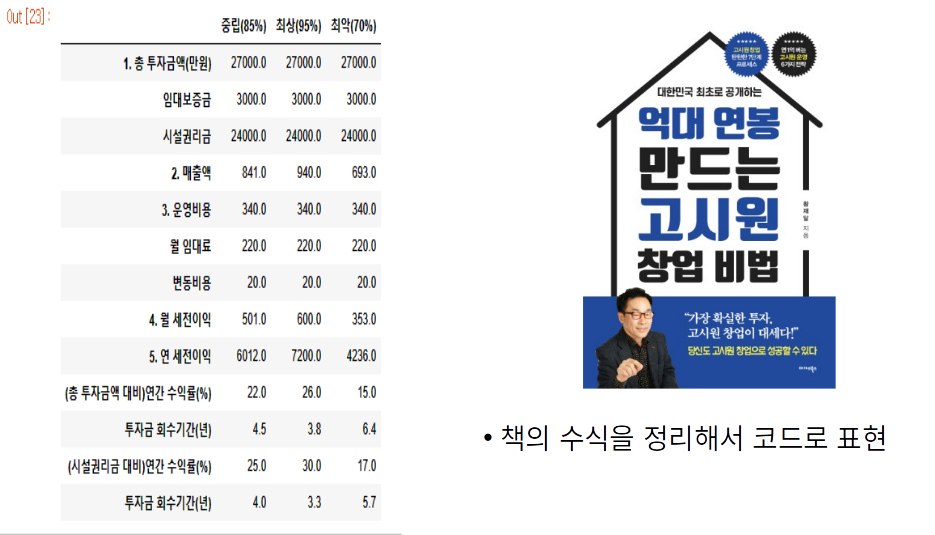

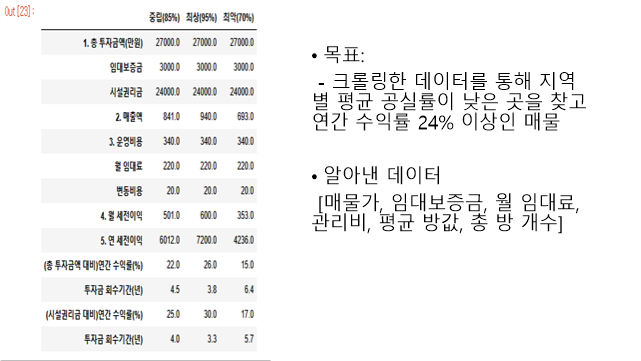

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns


%matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

plt.rcParams["axes.unicode_minus"] = False

rc("font", family="NanumGothic")

### 1) 데이터 전처리 과정

In [51]:
df = pd.read_csv("../data/gosiwon_계산결과_최종_0.1_drop_지역추가.csv", encoding="utf-8")
df

Unnamed: 0       고시원 이름    평수 총 방 갯수 총 욕실 갯수 주차 공간      보증금 월 임대료   관리비  \
0              0     서울 중구 명동   330   30 개   원30 개  00 대    3천 만원   220    20   
1              1   서울 구로구 대림역   360   40 개   원26 개   1 대    4천 만원   380    30   
2              2  서울 동작구 노량진동   430   24 개   큰24 개   1 대    7천 만원   280    30   
3              3   서울 광진구 구의동   420   42 개    42 개   1 대    4천 만원   475    60   
4              4   서울 중랑구 상봉동   390   30 개   원30 개   1 대    5천 만원   370    10   
...          ...          ...   ...    ...     ...   ...      ...   ...   ...   
2501        2501  서울 서대문구 00동  역세권       개       개  00 대  3600 만원   450     0   
2502        2502   서울 관악구 00동   330   36 개    25 개  00 대  4000 만원   450     0   
2503        2503    서울 중구 00동   500   45 개    44 개   1 대  4000 만원   450    20   
2504        2504   서울 강서구 강서동   500   53 개     5 개   1 대  5000 만원   436     0   
2505        2505   서울 종로구 00동   180   27 개     8 개  00 대  3000 만원   200   없슴    

       매물 총액  ... 연순수익_상 연순수익_중  연순수익_하  월순수익_상  월순수익_중  월순수익_하  순수익률_상  \
0      합2억7천  ...   9936   8460    6252     828     705     521      36   
1      합1억7천  ...   9900   8172    5568     825     681     464      58   
2      합2억4천  ...   5712   4620    2976     476     385     248      23   
3      합3억2천  ...  10572   8604    5652     881     717     471      33   
4      합2억7천  ...   5184   4032    2304     432     336     192      19   
...      ...  ...    ...    ...     ...     ...     ...     ...     ...   
2501  2억1000  ...   6732   5328    3228     561     444     269      32   
2502   19500  ...   6696   5268    3132     558     439     261      34   
2503   35000  ...  13584  11376    8052    1132     948     671      38   
2504      1억  ...  13188  11028    7788    1099     919     649     131   
2505   10000  ...   9444   8076    6036     787     673     503      94   

      순수익률_중  순수익률_하    지역  
0         31      23    중구  
1         48      32   구로구  
2         19      12   동작구  
3         26      17   광진구  
4         14       8   중랑구  
...      ...     ...   ...  
2501      25      15  서대문구  
2502      27      16   관악구  
2503      32      23    중구  
2504     110      77   강서구  
2505      80      60   종로구  

[2506 rows x 40 columns]

In [55]:
df["매물 총액 전처리"]
df["보증금 전처리"]
df["방 갯수 전처리"]
df["월 임대료 전처리"]
df["관리비 전처리"]

0       20
1       30
2       30
3       60
4       10
        ..
2501     0
2502     0
2503    20
2504     0
2505     0
Name: 관리비 전처리, Length: 2506, dtype: int64

In [56]:
df = df.astype({'매물 총액 전처리':'int',
               '보증금 전처리':'int',
               '방 갯수 전처리':'int',
               '월 임대료 전처리':'int',
               '관리비 전처리':'int',})

In [59]:
for idx, i in enumerate(df["방 갯수 전처리"]):
    try:
        int(i)
    except:
        df["방 갯수 전처리"][idx] = "0"
        print(idx, ": ", i)

In [60]:
df = df.astype({'매물 총액 전처리':'int',
               '방 갯수 전처리':'int',})

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2506 non-null   int64  
 1   고시원 이름      2506 non-null   object 
 2   평수          2506 non-null   object 
 3   총 방 갯수      2506 non-null   object 
 4   총 욕실 갯수     2506 non-null   object 
 5   주차 공간       2506 non-null   object 
 6   보증금         2505 non-null   object 
 7   월 임대료       2506 non-null   object 
 8   관리비         2506 non-null   object 
 9   매물 총액       2506 non-null   object 
 10  인근 지하철      2506 non-null   object 
 11  인근 대학교      2506 non-null   object 
 12  보증금 전처리     2506 non-null   int64  
 13  매물 총액 전처리   2506 non-null   int64  
 14  방 갯수 전처리    2506 non-null   int64  
 15  월 임대료 전처리   2506 non-null   int64  
 16  관리비 전처리     2506 non-null   int64  
 17  지역별 평균 월세   2506 non-null   int64  
 18  TC(총영업비용)   2506 non-null   int64  
 19  FC(고정비용)    2506 non-null  

### 2) 계산 과정

In [42]:
# 참고한 표 : https://blog.naver.com/happynick74/222069037959
# 데이터프레임 상에서 얻어낼 수 있는 값들 이거를 자동으로 넣어주는 코드 필요!

r = []

for n in range(len(df)):
    try:
        print(n)
        a = df["매물 총액 전처리"][n]
        b = df["보증금 전처리"][n]
        c = df["방 갯수 전처리"][n]
        d = df["월 임대료 전처리"][n]
        e = df["관리비 전처리"][n]

        total_price = a#24000 
        deposit = b     #5000 
        if c == 0:
            room_num = 30 #35  # 방 갯수가 0이면 30개로 함
        else:
            room_num = c #35 
        mon_rent = d #300 
        maintenance = e #20    
        
        ave_price = df["지역별 평균 월세"][n]

        premium = int(total_price - deposit) # 매물가 - 보증금
        #ave_price = (( int(total_price - deposit) / 24 ) / int(room_num)) # 방 하나당 평균 월 세전이익
        b_maintenance = int(room_num * (10/3))   # 고시원 변동비용: 수리비용, 유지보수 비용, 미케팅 비용 등이 있다고 한다.
                                                 # https://blog.naver.com/happynick74/222069037959 
            # 위 사이트 기준 변동비용 방30개 기준 -> 100만원 정도로 잡으라고 해서 임시로 잡음. 추정치 이므로 구체적으로 하려면 바꿔서 사용
        g_maintenance = mon_rent + maintenance   # 고시원 고정비용: 임대비용, 관리비, 공과금, 비품비, 인건비 등이 있다고 한다.
                                                 # 현재 월 임대료와 관리비만 포함. 추가로 넣고 싶으면 수정하세요.

        manage = int(b_maintenance + g_maintenance) # 고시원 변동비용 + 고정비용

        sales_mid = int(ave_price * room_num * (85/100)) # 월 매출액 공실률 15%
        sales_hi = int(ave_price * room_num * (95/100)) # 월 매출액 공실률 5%
        sales_low = int(ave_price * room_num * (70/100)) # 월 매출액 공실률 30%

        mon_profit_mid = int(sales_mid - manage) # 월 세전이익 85%
        mon_profit_hi = int(sales_hi - manage) # 월 세전이익 95%
        mon_profit_low = int(sales_low - manage) # 월 세전이익 70%

        year_profit_mid = int((sales_mid - manage)*12) # 연 매출액 세전이익 85%
        year_profit_hi = int((sales_hi - manage)*12) # 연 매출액 세전이익 95%
        year_profit_low = int((sales_low - manage)*12) # 연 매출액 세전이익 70%

        ann_revenue1_mid = int((year_profit_mid / total_price) * 100) # (총 투자금액 대비) 연간 투자 수익률 85%
        ann_revenue1_hi = int((year_profit_hi / total_price) * 100) # (총 투자금액 대비) 연간 투자 수익률 95%
        ann_revenue1_low = int((year_profit_low / total_price) * 100) # (총 투자금액 대비) 연간 투자 수익률 70%

        back1_mid = round((total_price / year_profit_mid), 1) # (총 투자금액 대비)투자 회수 기간 85%
        back1_hi = round((total_price / year_profit_hi), 1) # (총 투자금액 대비)투자 회수 기간 95%
        back1_low = round((total_price / year_profit_low), 1) # (총 투자금액 대비)투자 회수 기간 70%

        ann_revenue2_mid = int((year_profit_mid / premium) * 100) # (시설권리금 대비) 연간 투자 수익률 85%
        ann_revenue2_hi = int((year_profit_hi / premium) * 100) # (시설권리금 대비) 연간 투자 수익률 95%
        ann_revenue2_low = int((year_profit_low / premium) * 100) # (시설권리금 대비) 연간 투자 수익률 70%

        back2_mid = round((premium / year_profit_mid), 1) # (시설권리금 대비)투자 회수 기간 85%
        back2_hi = round((premium / year_profit_hi), 1) # (시설권리금 대비)투자 회수 기간 95%
        back2_low = round((premium / year_profit_low), 1) # (시설권리금 대비)투자 회수 기간 70%

        #if (int(((premium / 24)/ room_num) >= 30)): # 방 상태 미리 판단해보기
         #   print("방 상태가 좋은 매물로 추측 ")
        if ((ann_revenue1_mid & ann_revenue1_hi & ann_revenue1_low) >= 24 ): # 연간 투자 수익률이 24% 이상이면 좋은 매물
            print("총 투자금액 대비 매매하기 좋은 매물입니다. ")
            r.append(n)
                
        elif ((ann_revenue1_mid or ann_revenue1_hi or ann_revenue1_low) < 24 ): # 연간 투자 수익률이 하나라도 24% 미만이면 나쁜 매물
            print("총 투자금액 대비 매매하기 좋지 않은 매물입니다. ")

        elif ((ann_revenue2_mid & ann_revenue2_hi & ann_revenue2_low) >= 24 ): # 연간 투자 수익률이 24% 이상이면 좋은 매물
            print("시설권리금 대비 매매하기 좋은 매물입니다. ")
            r.append(n)
                
        elif ((ann_revenue2_mid or ann_revenue2_hi or ann_revenue2_low) < 24 ): # 연간 투자 수익률이 하나라도 24% 미만이면 나쁜 매물
            print("시설권리금 대비 매매하기 좋지 않은 매물입니다. ")  
                
        #else :
            #print("방 상태가 좋지 않은 매물로 추측 ")
    except:
        #print(n, "예외")
        pass


0
1
총 투자금액 대비 매매하기 좋은 매물입니다. 
2
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
3
4
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
5
총 투자금액 대비 매매하기 좋은 매물입니다. 
6
7
8
총 투자금액 대비 매매하기 좋은 매물입니다. 
9
총 투자금액 대비 매매하기 좋은 매물입니다. 
10
11
시설권리금 대비 매매하기 좋은 매물입니다. 
12
13
14
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
15
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
16
시설권리금 대비 매매하기 좋은 매물입니다. 
17
총 투자금액 대비 매매하기 좋은 매물입니다. 
18
시설권리금 대비 매매하기 좋은 매물입니다. 
19
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
20
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
21
총 투자금액 대비 매매하기 좋은 매물입니다. 
22
시설권리금 대비 매매하기 좋은 매물입니다. 
23
총 투자금액 대비 매매하기 좋은 매물입니다. 
24
25
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
26
27
시설권리금 대비 매매하기 좋은 매물입니다. 
28
시설권리금 대비 매매하기 좋은 매물입니다. 
29
30
31
32
33
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
34
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
35
36
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
37
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
38
39
시설권리금 대비 매매하기 좋은 매물입니다. 
40
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
41
42
시설권리금 대비 매매하기 좋은 매물입니다. 
43
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
44
45
46
시설권리금 대비 매매하기 좋은 매물입니다. 
47
48
총 투자금액 대비 매매하기 좋지 않은 매물입니다. 
49
총 투자금액 대비 매매하기 좋은 매물입니다. 
50
51
총 투자금액 대비 매매하기 

### 3) 수익률 확인 & 손익분기점 그래프

In [43]:
df12 = pd.read_csv("../data/gosiwon_계산결과_최종_0.1_drop.csv", encoding="utf-8")

In [44]:
df12.columns

Index(['Unnamed: 0', '고시원 이름', '평수', '총 방 갯수', '총 욕실 갯수', '주차 공간', '보증금',
       '월 임대료', '관리비', '매물 총액', '인근 지하철', '인근 대학교', '보증금 전처리', '매물 총액 전처리',
       '방 갯수 전처리', '월 임대료 전처리', '관리비 전처리', '지역별 평균 월세', 'TC(총영업비용)',
       'FC(고정비용)', 'VC(변동비용)', '회수기간_상', '회수기간_중', '회수기간_하', '연수익매출_상',
       '연수익매출_중', '연수익매출_하', '월수익매출_상', '월수익매출_중', '월수익매출_하', '연순수익_상',
       '연순수익_중', '연순수익_하', '월순수익_상', '월순수익_중', '월순수익_하', '순수익률_상', '순수익률_중',
       '순수익률_하'],
      dtype='object')

    '순수익률_중' 기준 상위 100개 집계

In [45]:
df12 = pd.read_csv("../data/gosiwon_계산결과_최종_0.1_drop_지역추가.csv", encoding="utf-8")

df12 = df12.sort_values(by=["순수익률_중"], ascending=False).head(100)
df12.head(10)

Unnamed: 0      고시원 이름      평수 총 방 갯수 총 욕실 갯수 주차 공간      보증금 월 임대료  \
1959        1959  서울 구로구 00동     285   24 개       개  00 대  2000 만원   150   
1901        1901  서울 구로구 00동     285   24 개       개  00 대  2000 만원   150   
2044        2044  서울 구로구 00동     285   24 개       개  00 대  2000 만원   150   
1811        1811  서울 구로구 00동     285   24 개       개  00 대  2000 만원   150   
774          774  서울 동작구 00동     217      개       개  00 대  3000 만원   200   
2254        2254  서울 구로구 00동     280   24 개       개  00 대  2000 만원   150   
2037        2037   서울 중구 00동   140평       개       개  00 대  3600 만원   415   
2006        2006   서울 종로구 00  243.83   40 개     3 개  00 대  3000 만원   300   
361          361  서울 송파구 00동     180   25 개     2 개  없음 대  3000 만원   215   
356          356  서울 송파구 00동     180   25 개     2 개  없음 대  3000 만원   215   

       관리비 매물 총액  ... 연순수익_상 연순수익_중  연순수익_하  월순수익_상  월순수익_중  월순수익_하  순수익률_상  \
1959     0  2000  ...   7080   6048    4488     590     504     374     354   
1901     0  2000  ...   7080   6048    4488     590     504     374     354   
2044     0  2000  ...   7080   6048    4488     590     504     374     354   
1811     0  2000  ...   7080   6048    4488     590     504     374     354   
774    없음   3000  ...   9396   8028    5976     783     669     498     313   
2254     0  2300  ...   7080   6048    4488     590     504     374     307   
2037     0  2600  ...   7836   6360    4152     653     530     346     301   
2006     0    5천  ...  13956  11940    8916    1163     995     743     279   
361    없음   3000  ...   8388   7128    5244     699     594     437     279   
356    없음   3000  ...   8388   7128    5244     699     594     437     279   

      순수익률_중  순수익률_하   지역  
1959     302     224  구로구  
1901     302     224  구로구  
2044     302     224  구로구  
1811     302     224  구로구  
774      267     199  동작구  
2254     262     195  구로구  
2037     244     159   중구  
2006     238     178  종로구  
361      237     174  송파구  
356      237     174  송파구  

[10 rows x 40 columns]

    평균 공실률이 가장 낮은 지역 상위 12개 조회

In [46]:
color_zero = zero_avg.sort_values('평균공실률(%)', ascending=True).head(12)
# 지역구 조회
pick_rg = []
for i in color_zero['지역']:
    pick_rg.append(i)

#df12['지역']

In [47]:
pick_rg

['도봉구',
 '금천구',
 '강서구',
 '용산구',
 '양천구',
 '강북구',
 '은평구',
 '강동구',
 '종로구',
 '중구',
 '중랑구',
 '서대문구']

In [63]:
pick = []

for i in pick_rg:
    pick.append(df12.index[(df12['지역']==i)])

# 인덱스 list
print(pick[1])
# for i in pick_rg :
#     print(i)
#     for j in df_mean:
#         if i == j['고시원 이름'] :
#             idx_num = df_mean.index

# 지역별 Df list
pick_tb = []

for i in range(0, len(pick)):
    s = df12.loc[pick[i][:]]
    pick_tb.append(s)


# 인덱스 번호는 지역별 공실률 낮은 순입니다.
# 지역구별 df, index[0:12] 도봉구, 금천구, 강서구, 용산구, 양천구, 강북구, 은평구, 강동구, 종로구, 중구, 중랑구, 서대문구
pick_tb[1]

Int64Index([1993, 248], dtype='int64')


Unnamed: 0      고시원 이름   평수 총 방 갯수 총 욕실 갯수 주차 공간      보증금 월 임대료  \
1993        1993  서울 금천구 가산동  300   46 개     0 개   1 대    4천 만원   275   
248          248  서울 금천구 00동  230   35 개       개  00 대  3000 만원   240   

          관리비  매물 총액  ... 연순수익_상 연순수익_중  연순수익_하  월순수익_상  월순수익_중  월순수익_하  \
1993   20수도료   합5500  ...  14544  12444    9300    1212    1037     775   
248         0   6000  ...  10884   9288    6888     907     774     574   

      순수익률_상  순수익률_중  순수익률_하   지역  
1993     264     226     169  금천구  
248      181     154     114  금천구  

[2 rows x 40 columns]

In [31]:
#pick_tb[1].columns

In [32]:
a = pick_tb[1].loc[1993]
total_price = a.loc["매물 총액 전처리"]
month_profit_m = a.loc["월수익매출_중"]
month_profit_h = a.loc["월수익매출_상"]
month_profit_l = a.loc["월수익매출_하"]
year_profit_m = a.loc["연수익매출_중"]
year_profit_h = a.loc["연수익매출_상"]
year_profit_l = a.loc["연수익매출_하"]
profit_per_m = a.loc["순수익률_중"]
profit_per_h = a.loc["순수익률_상"]
profit_per_l = a.loc["순수익률_하"]
back_m = a.loc["회수기간_중"]
back_h = a.loc["회수기간_상"]
back_l = a.loc["회수기간_하"]

In [33]:
col = ['중립(85%)', '최상(95%)', '최악(70%)']
ind = ['1. 총 투자금액(만원)','2. 월 세전이익', '3. 연 세전이익', '4.순수익률(%)', '5.투자금 회수기간(년)']
con = [[total_price, total_price, total_price], 
       [month_profit_m, month_profit_h, month_profit_l],
       [year_profit_m, year_profit_h, year_profit_l],
       [profit_per_m, profit_per_h, profit_per_l],
       [back_m, back_h, back_l]]

best_gosiwon_df = pd.DataFrame(con, columns=col, index=ind)
best_gosiwon_df

중립(85%)  최상(95%)  최악(70%)
1. 총 투자금액(만원)   5500.0   5500.0   5500.0
2. 월 세전이익       1485.0   1660.0   1223.0
3. 연 세전이익      17820.0  17820.0  17820.0
4.순수익률(%)        226.0    264.0    169.0
5.투자금 회수기간(년)      0.4      0.4      0.6

In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns


%matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

plt.rcParams["axes.unicode_minus"] = False

rc("font", family="NanumGothic")

plt.rcParams['axes.unicode_minus'] = False

In [37]:
#matplotlib.matplotlib_fname()

    손익분기점 그래프 시각화

In [39]:
def draw(index):
    total = df12["매물 총액 전처리"][index]
    m_rentm = df12["월 임대료 전처리"][index]
    maintenance = df12["관리비 전처리"][index]
    m_rentp = df12["월순수익_중"][index]

    prev_total = total

    x=[]
    y=[]
    
    total_x = []
    total_y = []
    
    for i in range(40):
        total = total + m_rentm + maintenance - m_rentp

        if total >= 0:
            j = i
            g = m_rentp*i
            
        total_x.append(total)
        total_y.append(i)

        x.append(-(total))
        y.append(i)
    
    plt.figure(figsize=(16, 12))

    plt.scatter(j, 0, s=150, c="black")  # 손익분기점
    plt.text(j+1, 0, '손익분기점 {} 개월'.format(j), fontsize=20)
    
    plt.plot(y, x, '-', lw=5, color="red")                          # 순수익
    plt.text(y[-1], x[-1], '수익', fontsize=20)
    
    plt.plot(total_y[:j*2], total_x[:j*2], '-', lw=5, color="dodgerblue")  # 매물가격
    plt.text(total_y[0], total_x[0], '손해', fontsize=20)
    
    plt.plot(y, [ 0 for i in range(len(y)) ], '-', lw=1, color="black") # Y축 // X = 0
    plt.plot([ j for i in range(len(x)) ], x, '-', lw=1, color="black") # X축 // Y = 0
    
    
    plt.xlabel('Month', fontsize=30)
    plt.ylabel('Price', fontsize=30, rotation="horizontal")

    sns.set_style('whitegrid') # 격자 무늬

 # 금천구 가산동 1위 매물

# X축 = 가격
# Y축 = 월

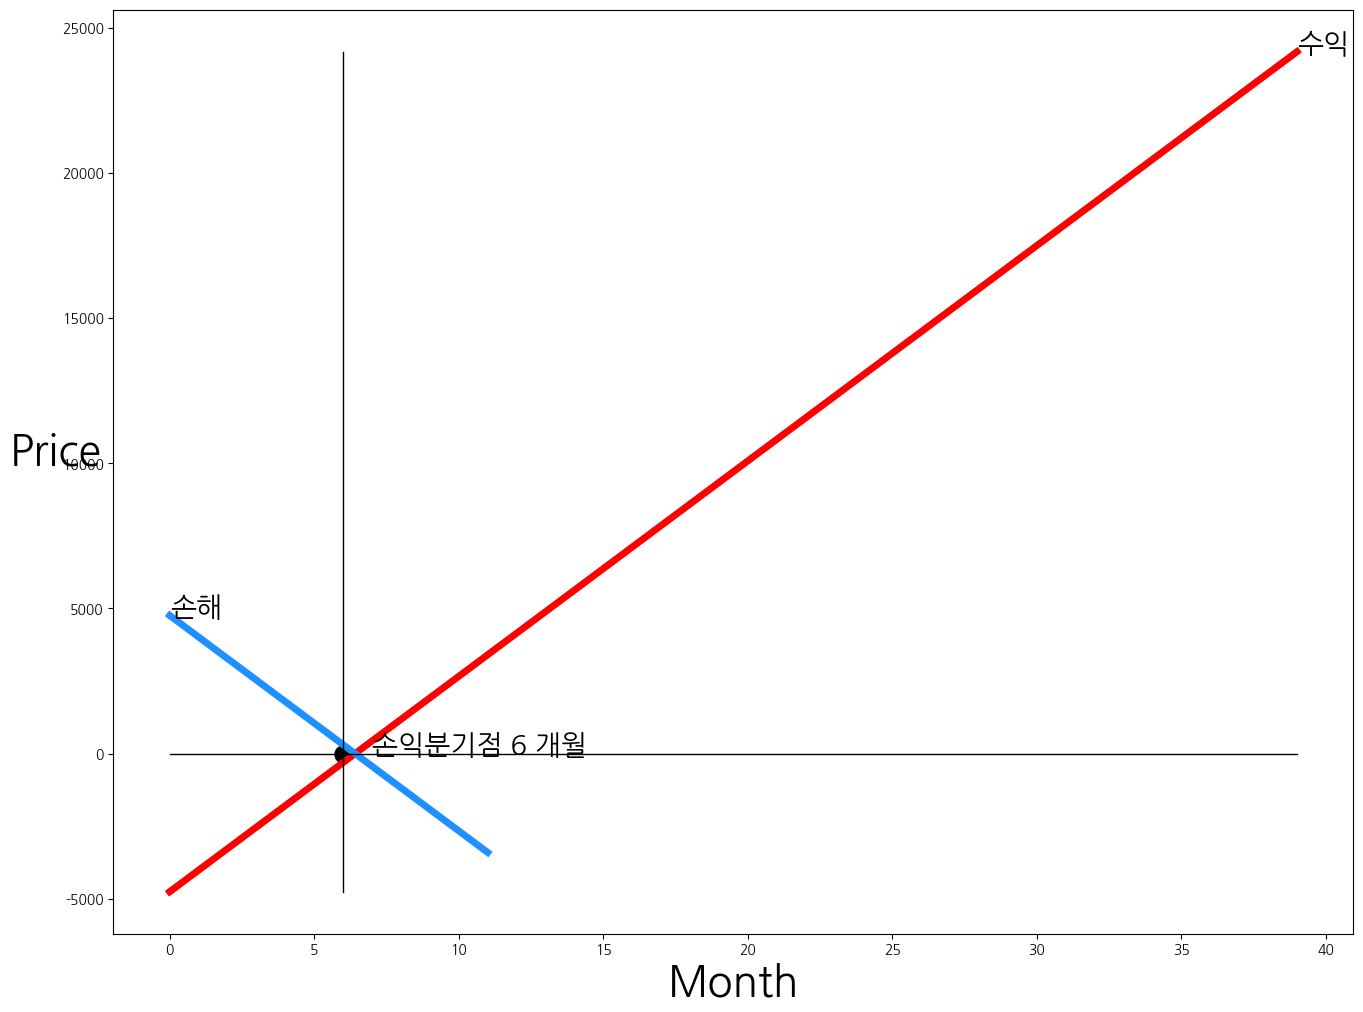

In [40]:
draw(1993)